# Artificial Intelligence Predictions in Cyber Security: Analysis and Early Detection of Cyber Attacks

In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Dala Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
df_UNSW_NB15 = pd.read_csv("/content/drive/MyDrive/Cyber/datasets/UNSW_NB15.csv")
df_UNSW_NB15.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## About dataset
* script: Source IP address
* sport: Source port IP
* dstip: Destination IP address
* dsport: Destination port number
* proto:: Transaction protocol
* state: Indicates the state and its dependent protocol, e.g., ACC, CLO, CON, ECO, ECR, FIN, INT,MAS, PAR,...
* dur: Record total duration
* sbytes: Source to destination transaction bytes
* dbytes: Destination to source transaction bytes
* sttl: Source to destination time to live value
* dttl: Destination to source time to live value
* sloss: Source packets retransmitted or dropped
* dloss: Destination packets retransmitted or dropped
* service: http, ftp, smtp, ssh, dns, ftp-data, irc and (-) if not much used service
* Sload: Source bits per second
* Dload: Destination bits per second
* Spkts: Source to destination packet count
* Dpkts: Destination to source packet count
* swin: Source TCP window advertisement value
* dwin: Destination TCP window advertisement value
* stcpb: Source TCP base sequence number
* dtcpb: Destination TCP base sequence number
* smeansz: Mean of the flow packet size transmitted by the source
* dmeansz: Mean of the flow packet size transmitted by the destination
* trans_depth: Represents the pipelined depth into the connection of http request/response transaction
* res_bdy_len: Actual uncompressed content size of the data transferred from the server’s http service
* Sjit: Source jitter (mSec)
* Djit: Destination jitter (mSec)
* Smite: Record start time
* Ltim: Record last time
* Sintpkt: Source interpacket arrival time (mSec)
* Dintpkt: Destination interpacket arrival time (mSec)
* tcprtt: TCP connection setup round-trip time, the sum of ‘synack’ and ‘ackdat’
* synack: TCP connection setup time, the time between the SYN and the SYN_ACK packets
* ackdat: TCP connection setup time, the time between the SYN_ACK and the ACK packets
* is_sm_ips_ports: If source (1) and destination (3) IP addresses equal and port numbers (2)(4) equal then, this variable...
* ct_state_ttl: No. for each state (6) according to specific range of values for source/destination time to live (10...
* ct_flw_http_mthd: No. of flows that has methods such as Get and Post in http service
* is_ftp_login: If the FTP session is accessed by user and password then 1 else 0
* ct_ftp_cmd: No of flows that has a command in FTP session
* ct_srv_src: No. of connections that contain the same service (14) and source address (1) in 100 connections...
* ct_srv_dst: No. of connections that contain the same service (14) and destination address (3) in 100 connections...
* ct_dst_Item: No. of connections of the same destination address (3) in 100 connections according to the last time...
* ct_src_Itm: No. of connections of the same source address (1) in 100 connections according to the last time (26)...
* ct_dtc_dport_Itm: No of connections of the same source address (1) and the destination port (4) in 100 connections acc...
* ct_dst_sport_Itm: No of connections of the same destination address (3) and the source port (2) in 100 connections acc...
* ct_dst_src_Itm: No of connections of the same source (1) and the destination (3) address in 100 connections according...
* attack_cat: The name of each attack category. In this data set, nine categories e.g. Fuzzers, Analysis, Backdoo...
* Label: 0 for normal and 1 for attack records



In [ ]:
df_UNSW_NB15.shape

(175341, 45)

In [ ]:
df_UNSW_NB15.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df_UNSW_NB15.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
df_UNSW_NB15["attack_cat"].value_counts()/len(df_UNSW_NB15)*100

attack_cat
Normal            31.937767
Generic           22.812691
Exploits          19.044605
Fuzzers           10.370649
DoS                6.994371
Reconnaissance     5.983198
Analysis           1.140635
Backdoor           0.995774
Shellcode          0.646169
Worms              0.074141
Name: count, dtype: float64

In [ ]:
df_UNSW_NB15["label"].value_counts()

label
1    119341
0     56000
Name: count, dtype: int64

In [ ]:
df_UNSW_NB15.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## Analyze the Distribution of Data Fields

In [9]:
import seaborn as sns

<ipython-input-11-4a82ffd3d9d3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


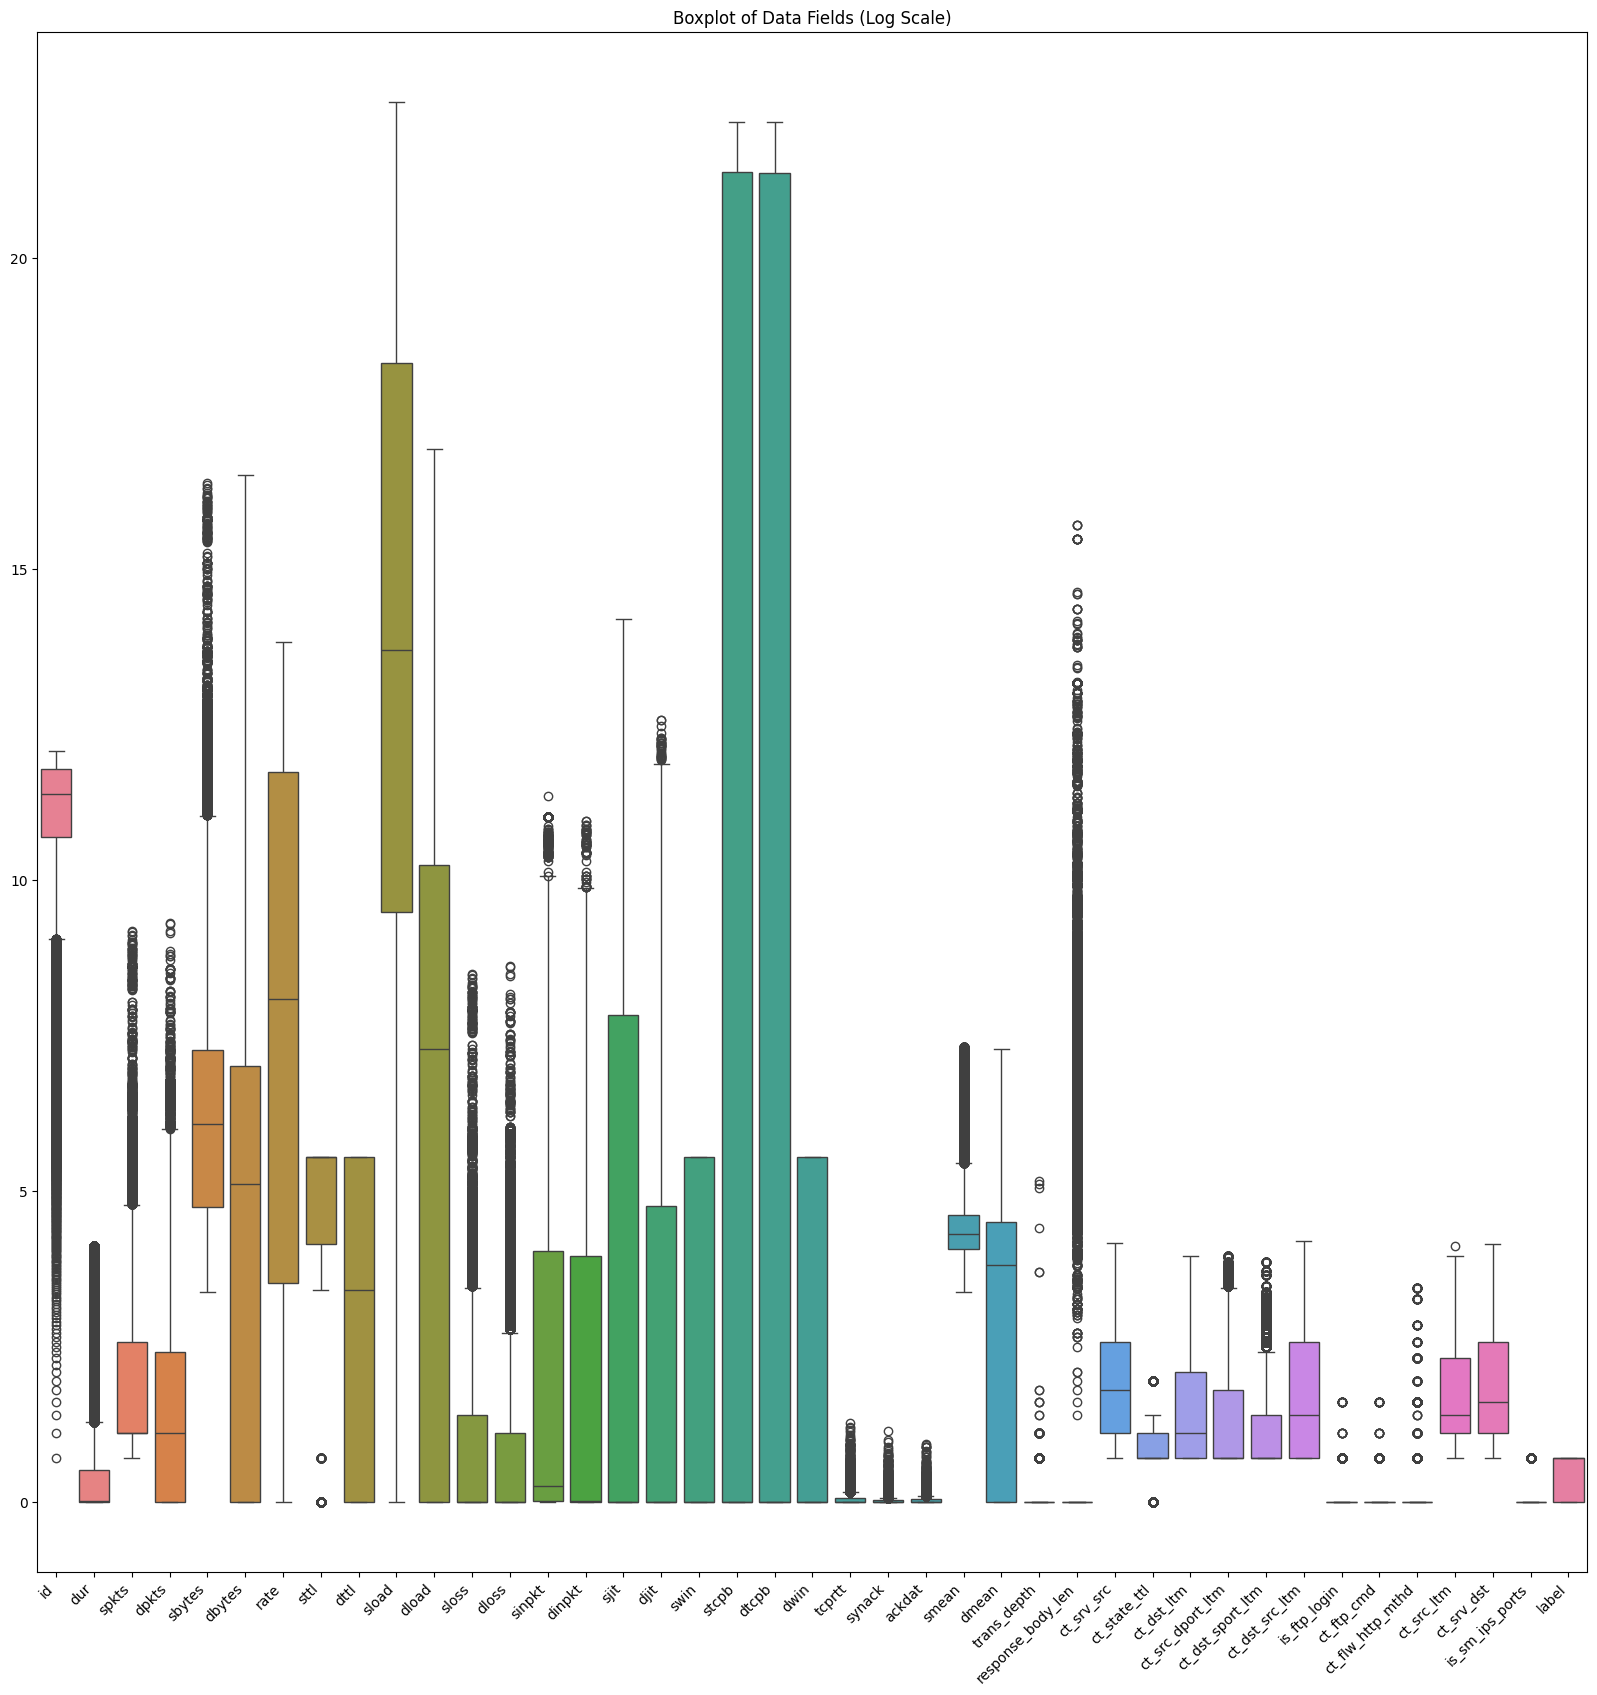

In [11]:
numeric_columns = df_UNSW_NB15.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
ax = sns.boxplot(data=np.log1p(df_UNSW_NB15[numeric_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Boxplot of Data Fields (Log Scale)')
plt.show()

* Unusual Network Activity: There may be unusual network activity or network attacks, causing some traffic to have unusual packet numbers, data amounts, or durations.

* Large Transactions: Transactions or connections that can take long periods of time or transfer large amounts of data, creating outliers.

* Error Feed: If the data provided from the source is incorrect or contains errors, it may contain unrealistic values, leading to the occurrence of exceptions.

* Cyber Attacks: Cyber attacks can create unusual behavior in data, such as transmitting large amounts of packets or performing unusual transactions.

* Measurement Bias: If the measurement process is inaccurate or has errors, it can lead to outliers in the data.

* System Problems: Problems in the system or network equipment can also cause outliers, due to the inability to accurately measure or record data.

## Correlation

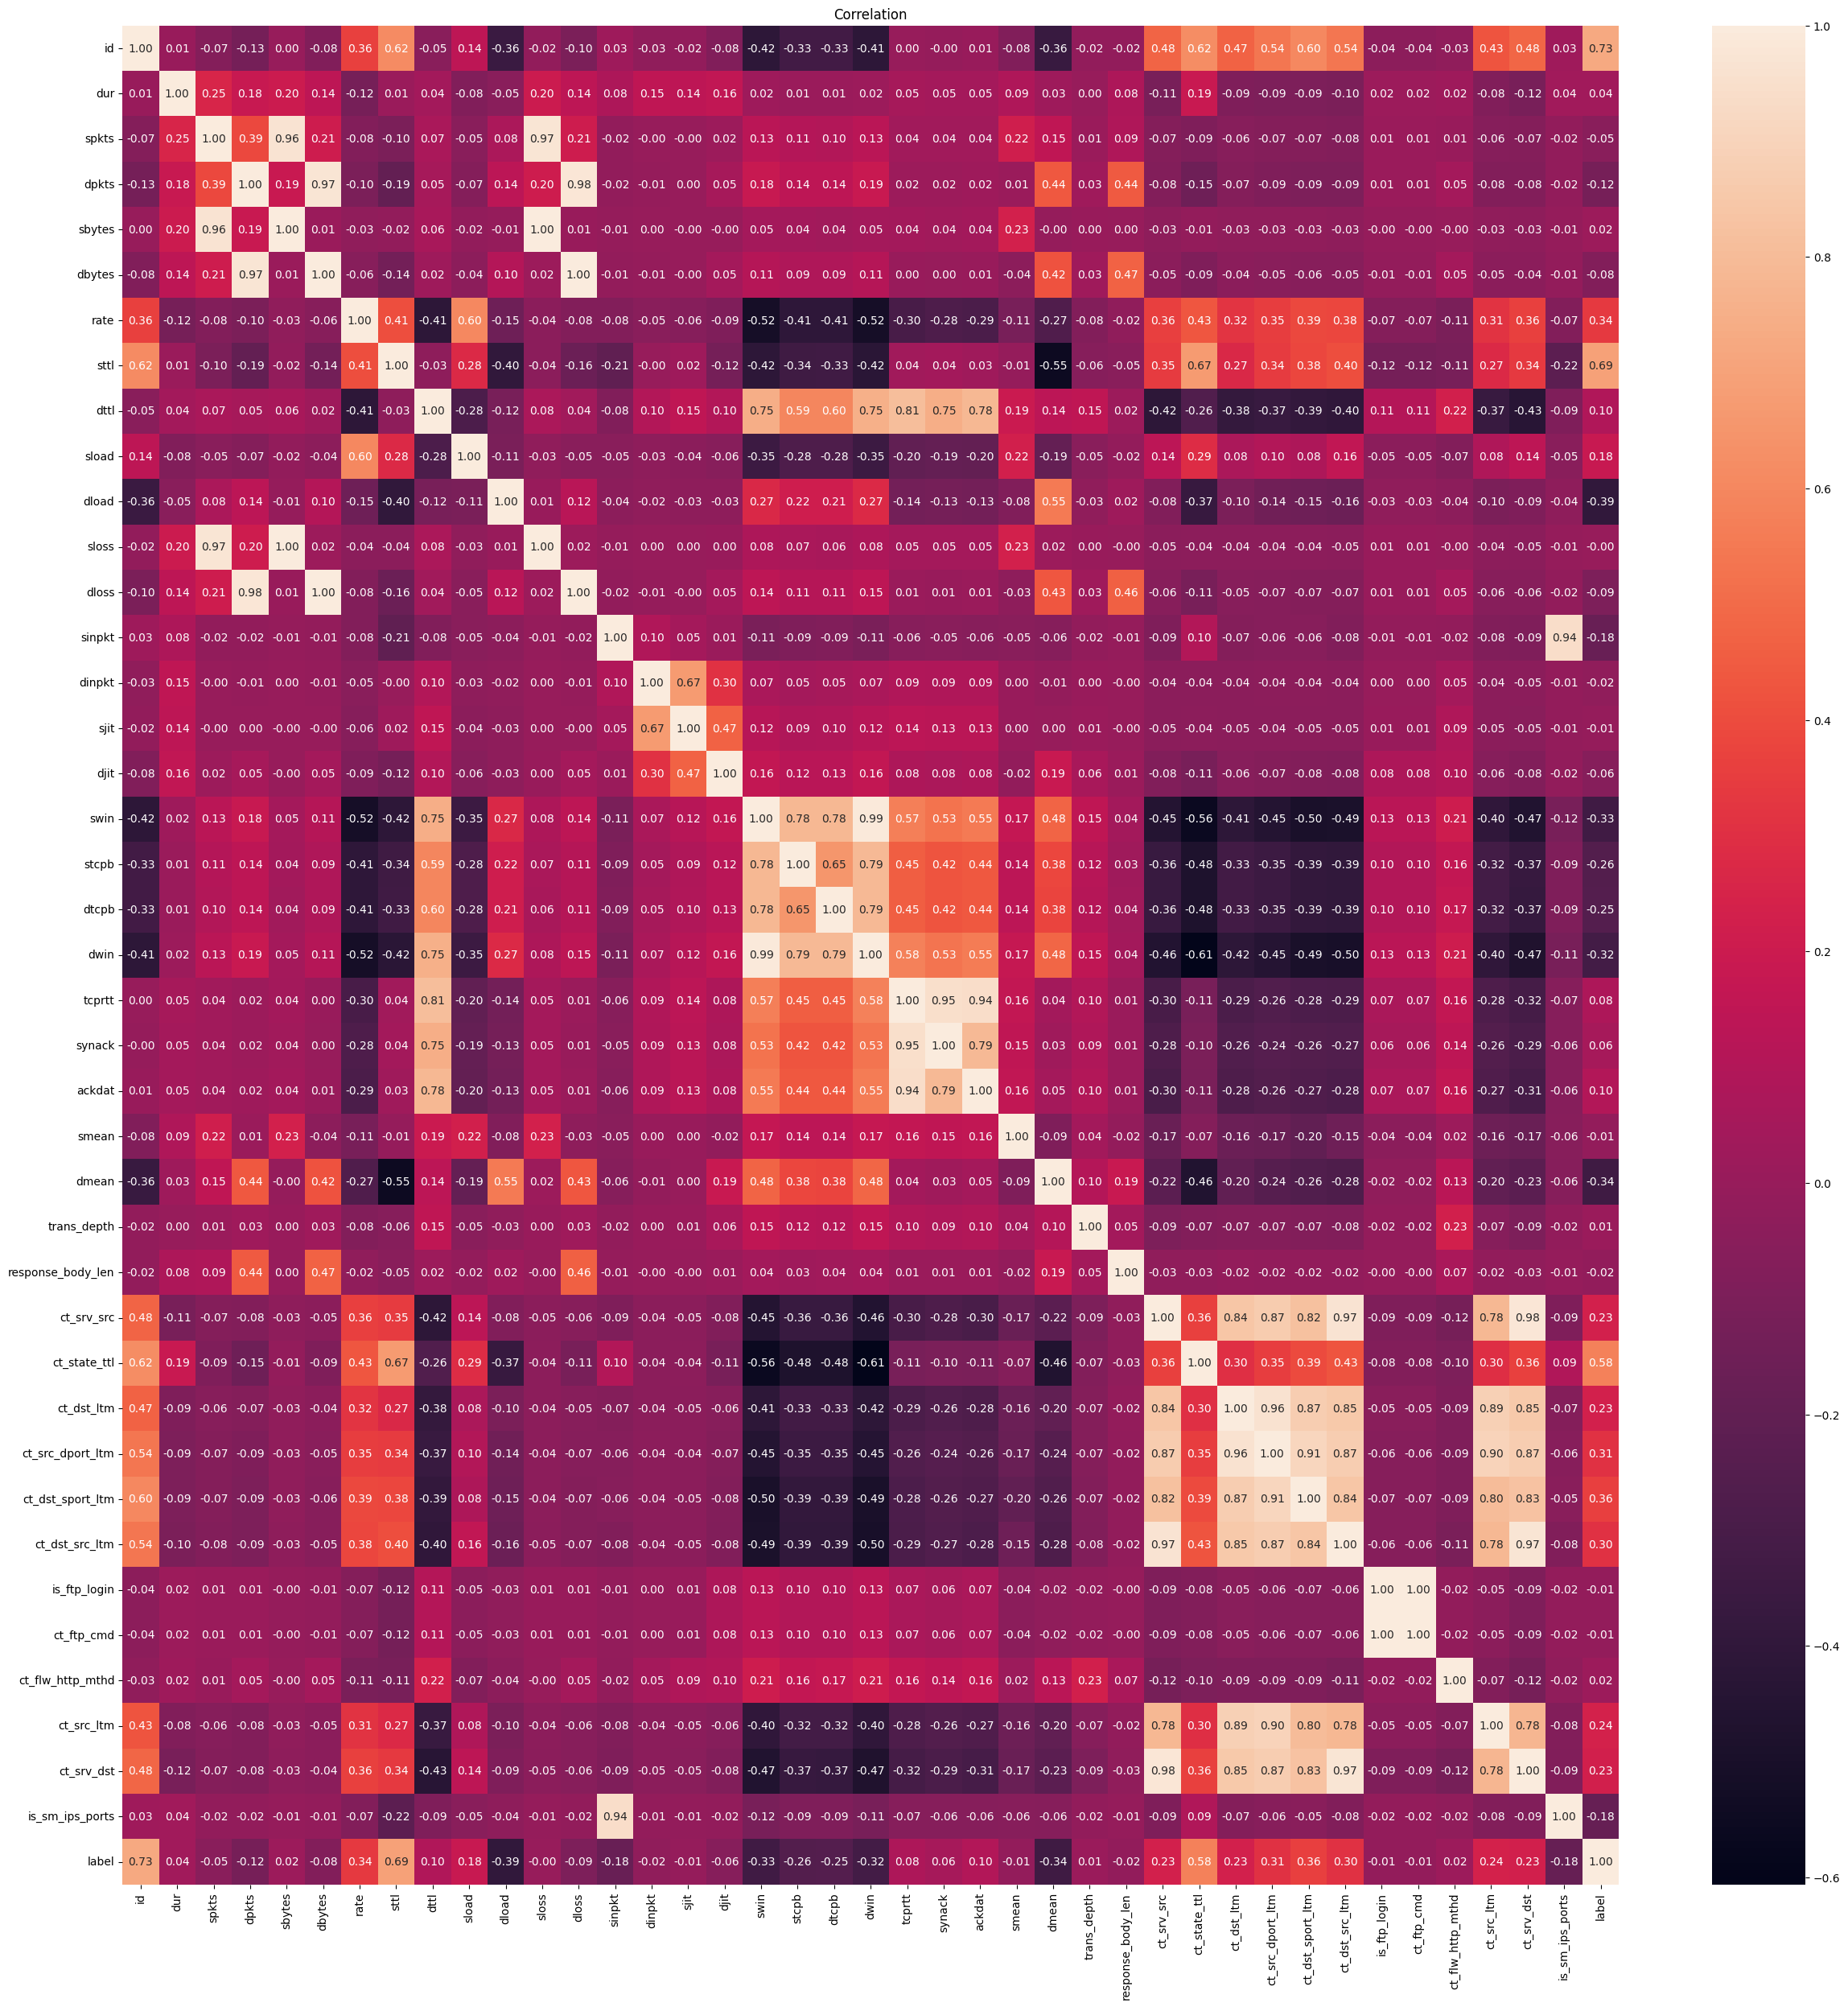

In [12]:
correlation_matrix = df_UNSW_NB15[numeric_columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation')
plt.show()

**Variables with Strong Positive Relationships:**

* spkts and sbytes have a strong positive relationship with dpkts and dbytes (correlation > 0.95). This may indicate a high correlation between the number of packets and the number of bytes in the packets.

* ct_srv_src has a strong positive relationship with ct_src_ltm, ct_srv_dst, and some other variables.

Variables with Strong Negative Relationships:

* dttl has a strong negative relationship with sttl (correlation < -0.45). This suggests a contrasting relationship between the Time to Live of the source and destination.

* dload has a strong negative relationship with sload (correlation < -0.35). This indicates an opposing relationship between download and upload loads.

**Variables with No Significant Relationships:**

* Some variables have a correlation very close to 0, for example: id, dwin, trans_depth.
General Relationships:

* Variables related to the number of packets and bytes tend to have a high correlation with each other.

* Time-related variables (e.g., dur, tcprtt, synack, ackdat) do not show strong relationships with other variables.

**Identifying Strong Relationships Between Variable Pairs:**
**Positive Relationships:**

* spkts and sbytes:

* Strong positive correlation (correlation > 0.95).
Indicates a close relationship between the number of packets (spkts) and the number of bytes (sbytes).

ct_srv_src and ct_src_ltm:

* Strong positive correlation (correlation = 0.822486).
Suggests a significant relationship between the number of connections with the same service and source address (ct_srv_src) and the number of connections with the same source address (ct_src_ltm).

ct_srv_src and ct_srv_dst:

* Strong positive correlation.
Indicates a close relationship between the number of connections with the same service and source address (ct_srv_src) and the number of connections with the same service and destination address (ct_srv_dst).

**Negative Relationships: dttl and sttl:**

* Strong negative correlation (correlation < -0.45).
Suggests an inverse relationship between the Time to Live of the destination (dttl) and the Time to Live of the source (sttl).
dload and sload:

* Strong negative correlation (correlation < -0.35).
Indicates an opposing relationship between download load (dload) and upload load (sload).

## Analysis of Attack Types

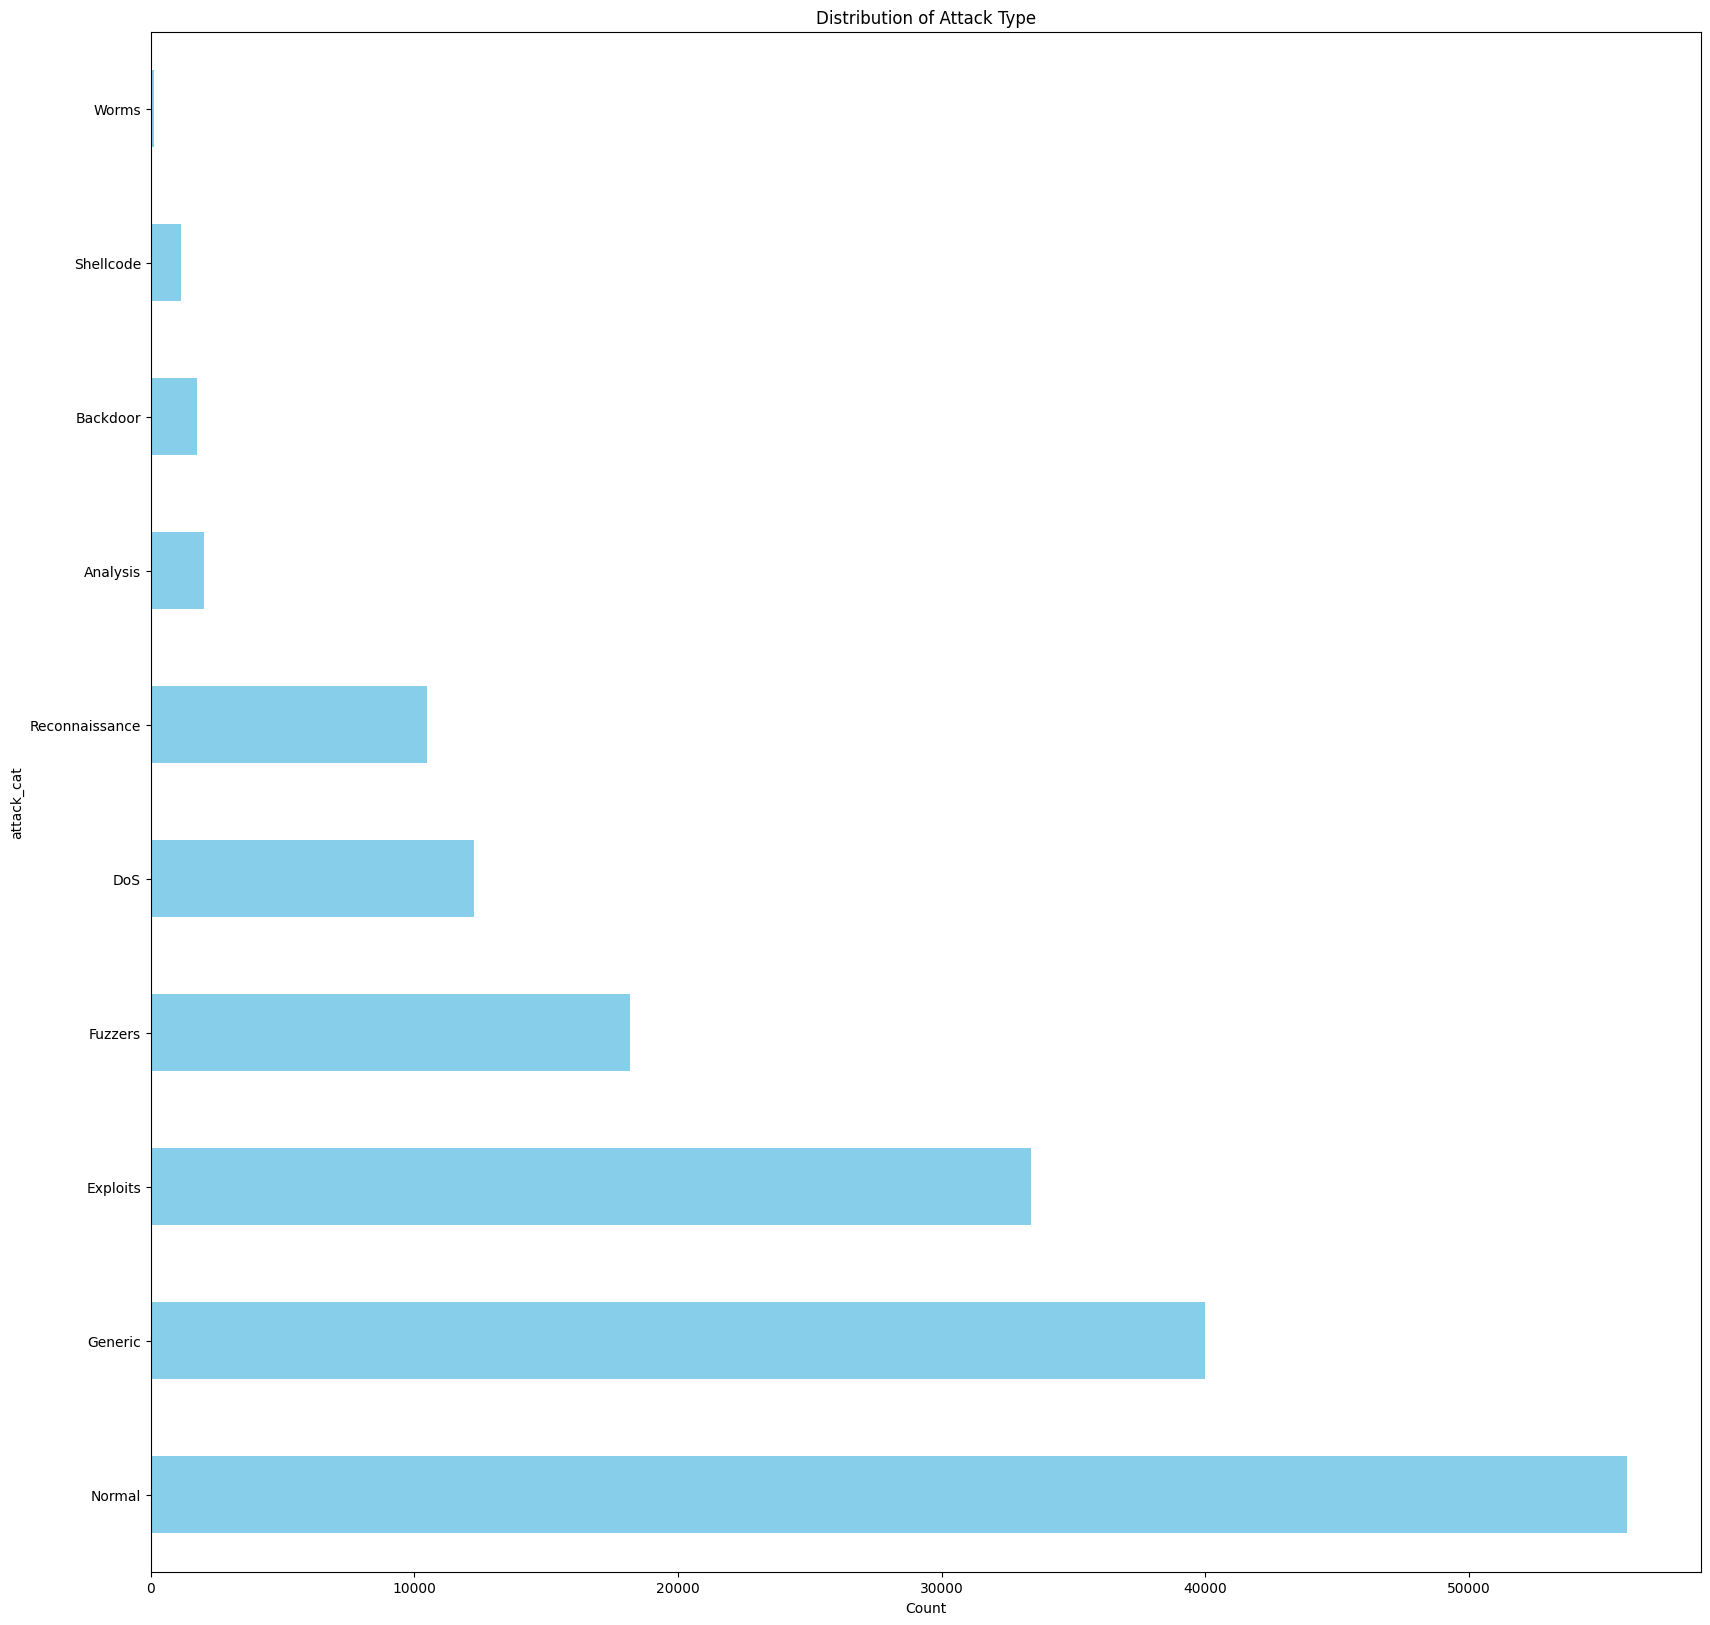

In [13]:
attack_cat_distribution = df_UNSW_NB15['attack_cat'].value_counts()
plt.figure(figsize=(20, 20))
attack_cat_distribution.plot(kind='barh', color='skyblue')
plt.title('Distribution of Attack Type')
plt.xlabel('Count')
plt.show()

* Common Attack Types: “Normal” dominates the data, suggesting that most communications in the network are legitimate and attack-free.

* Dominant Attack Type: "Generic", "Exploits", and "Fuzzers" make up a large number of attack types. This may imply that the system needs to pay special attention to these types of attacks, and security measures can be implemented to prevent them.

* Critical Attack Type: "Worms" are the least numerous, but they can often cause great damage due to their ability to spread quickly. Although small in number, special attention should be paid to this type of attack because of its highly dangerous nature.
* Specific Classification: Classifications such as "DoS", "Reconnaissance", "Analysis", "Backdoor", and "Shellcode" are also represented in the data, creating a need to detect and prevent specific types of attacks.
* The Importance of Classification: Understanding the types of attacks and classifying them helps determine priorities and appropriate security approaches. For example, a system can focus strongly on preventing "Exploits" attacks if they account for a high proportion.

## Comparison Between Normal and Attack Data

<Figure size 2000x2000 with 0 Axes>

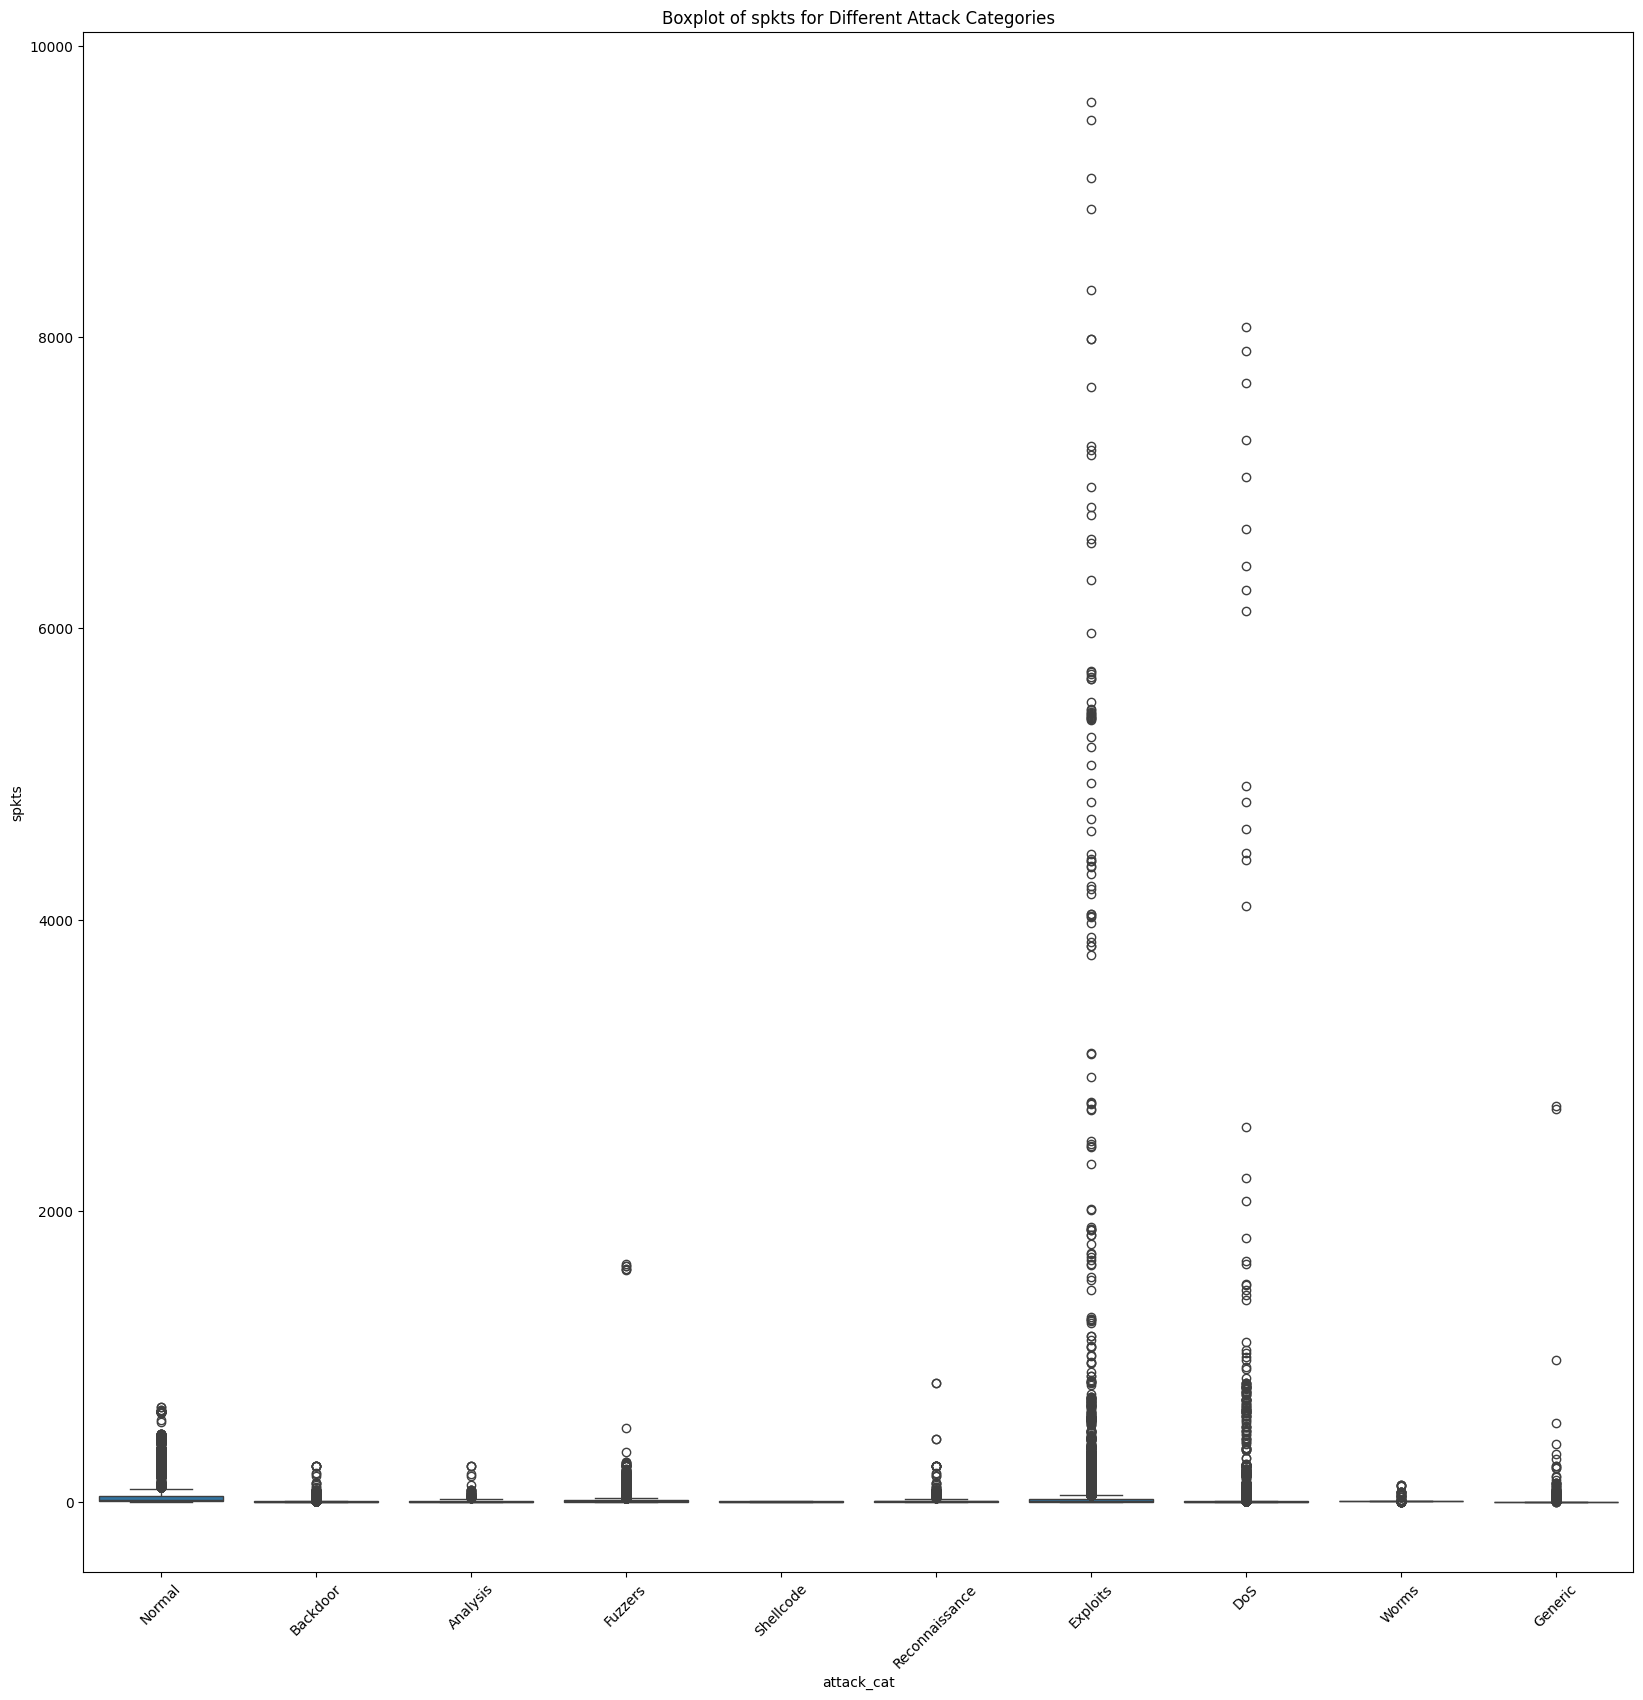

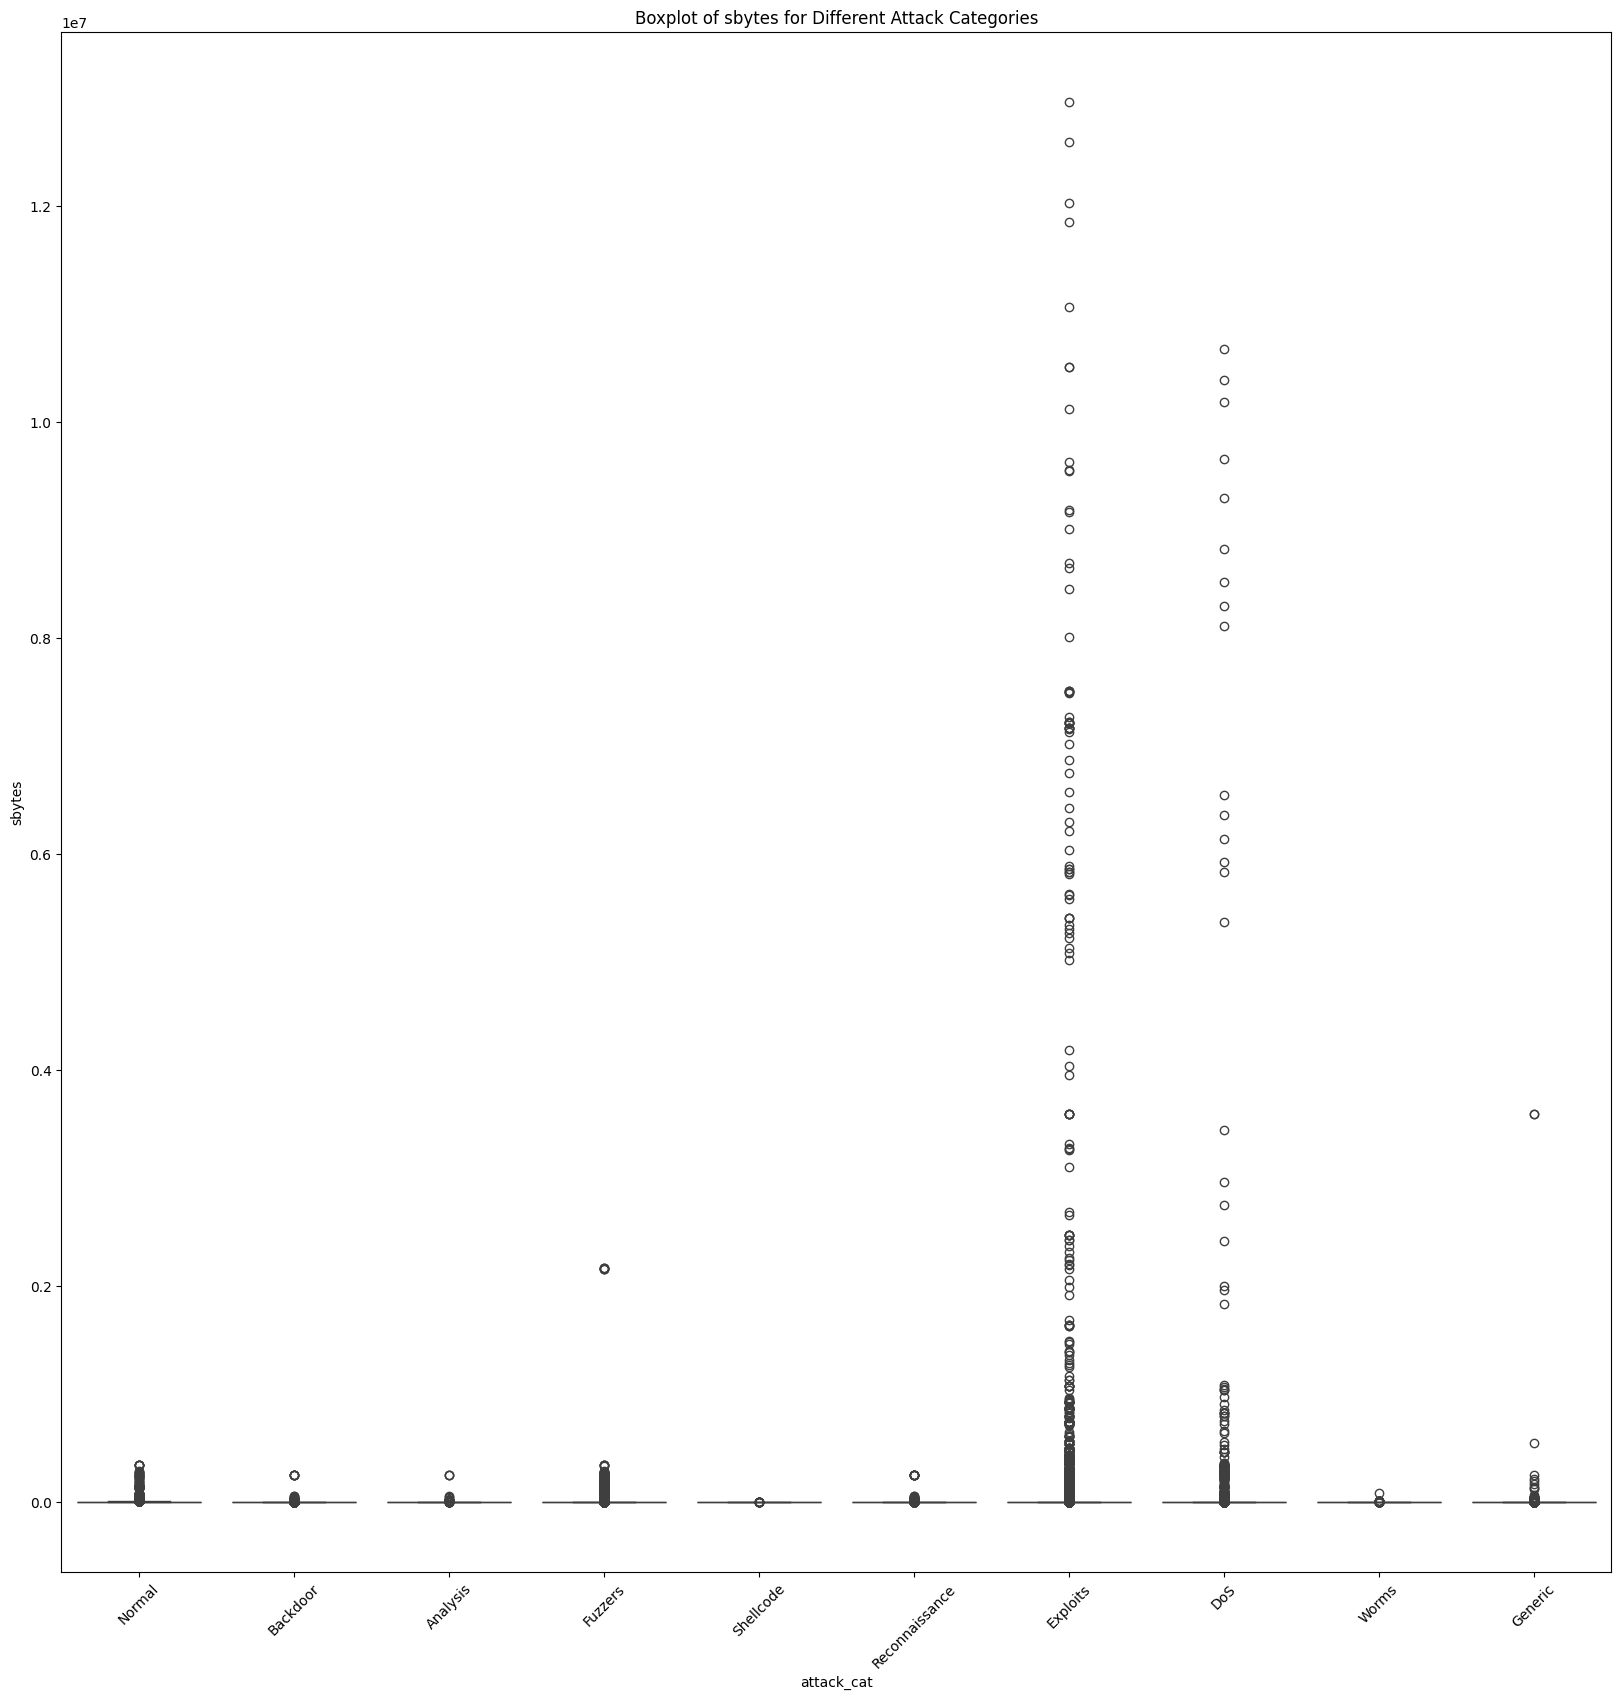

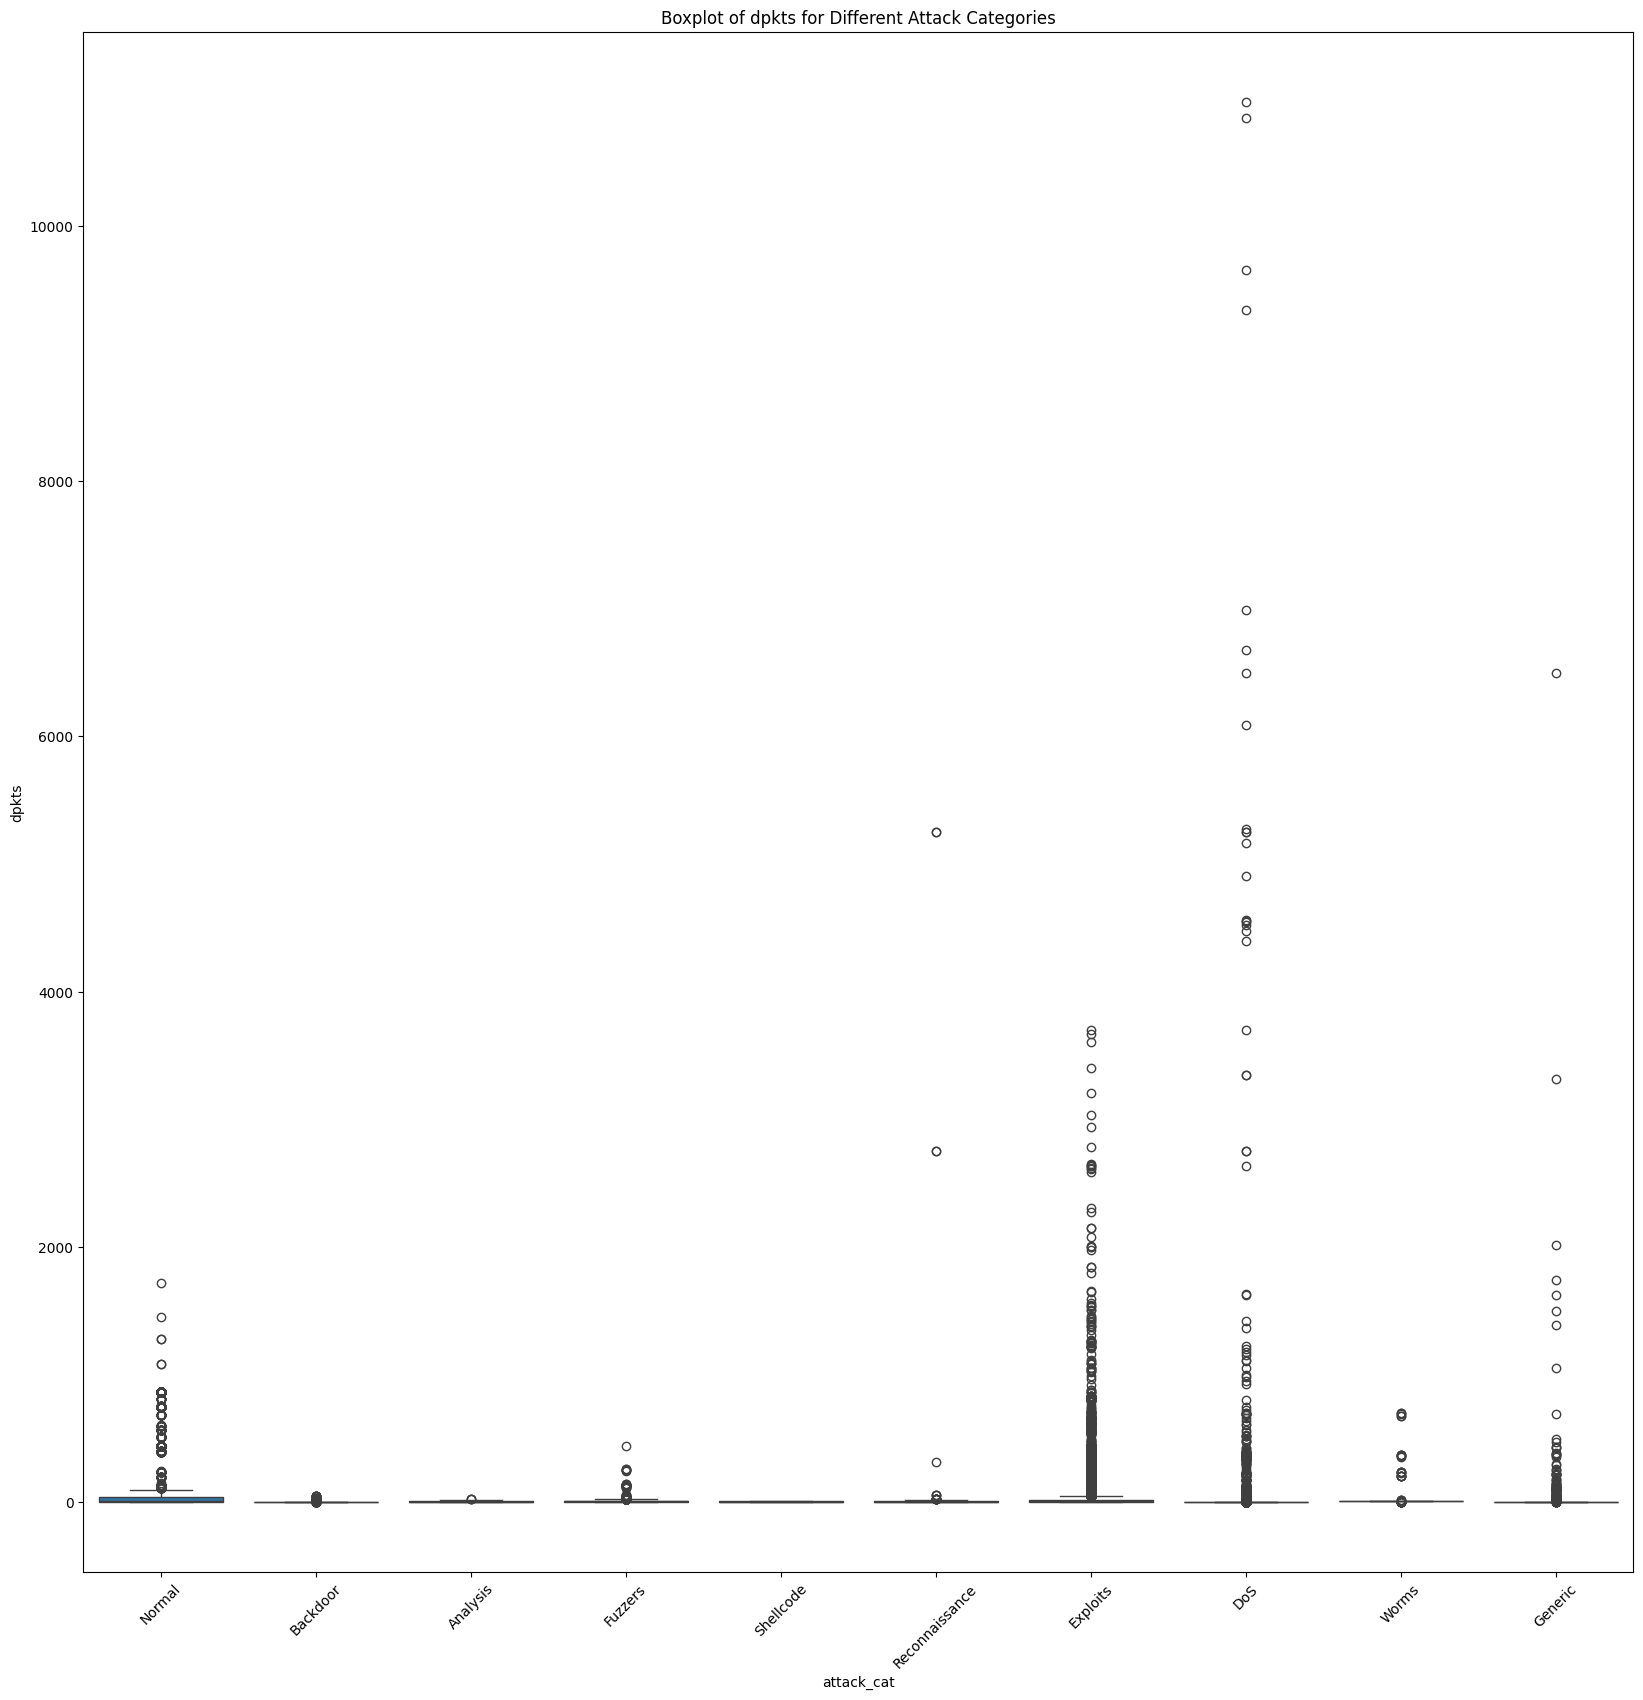

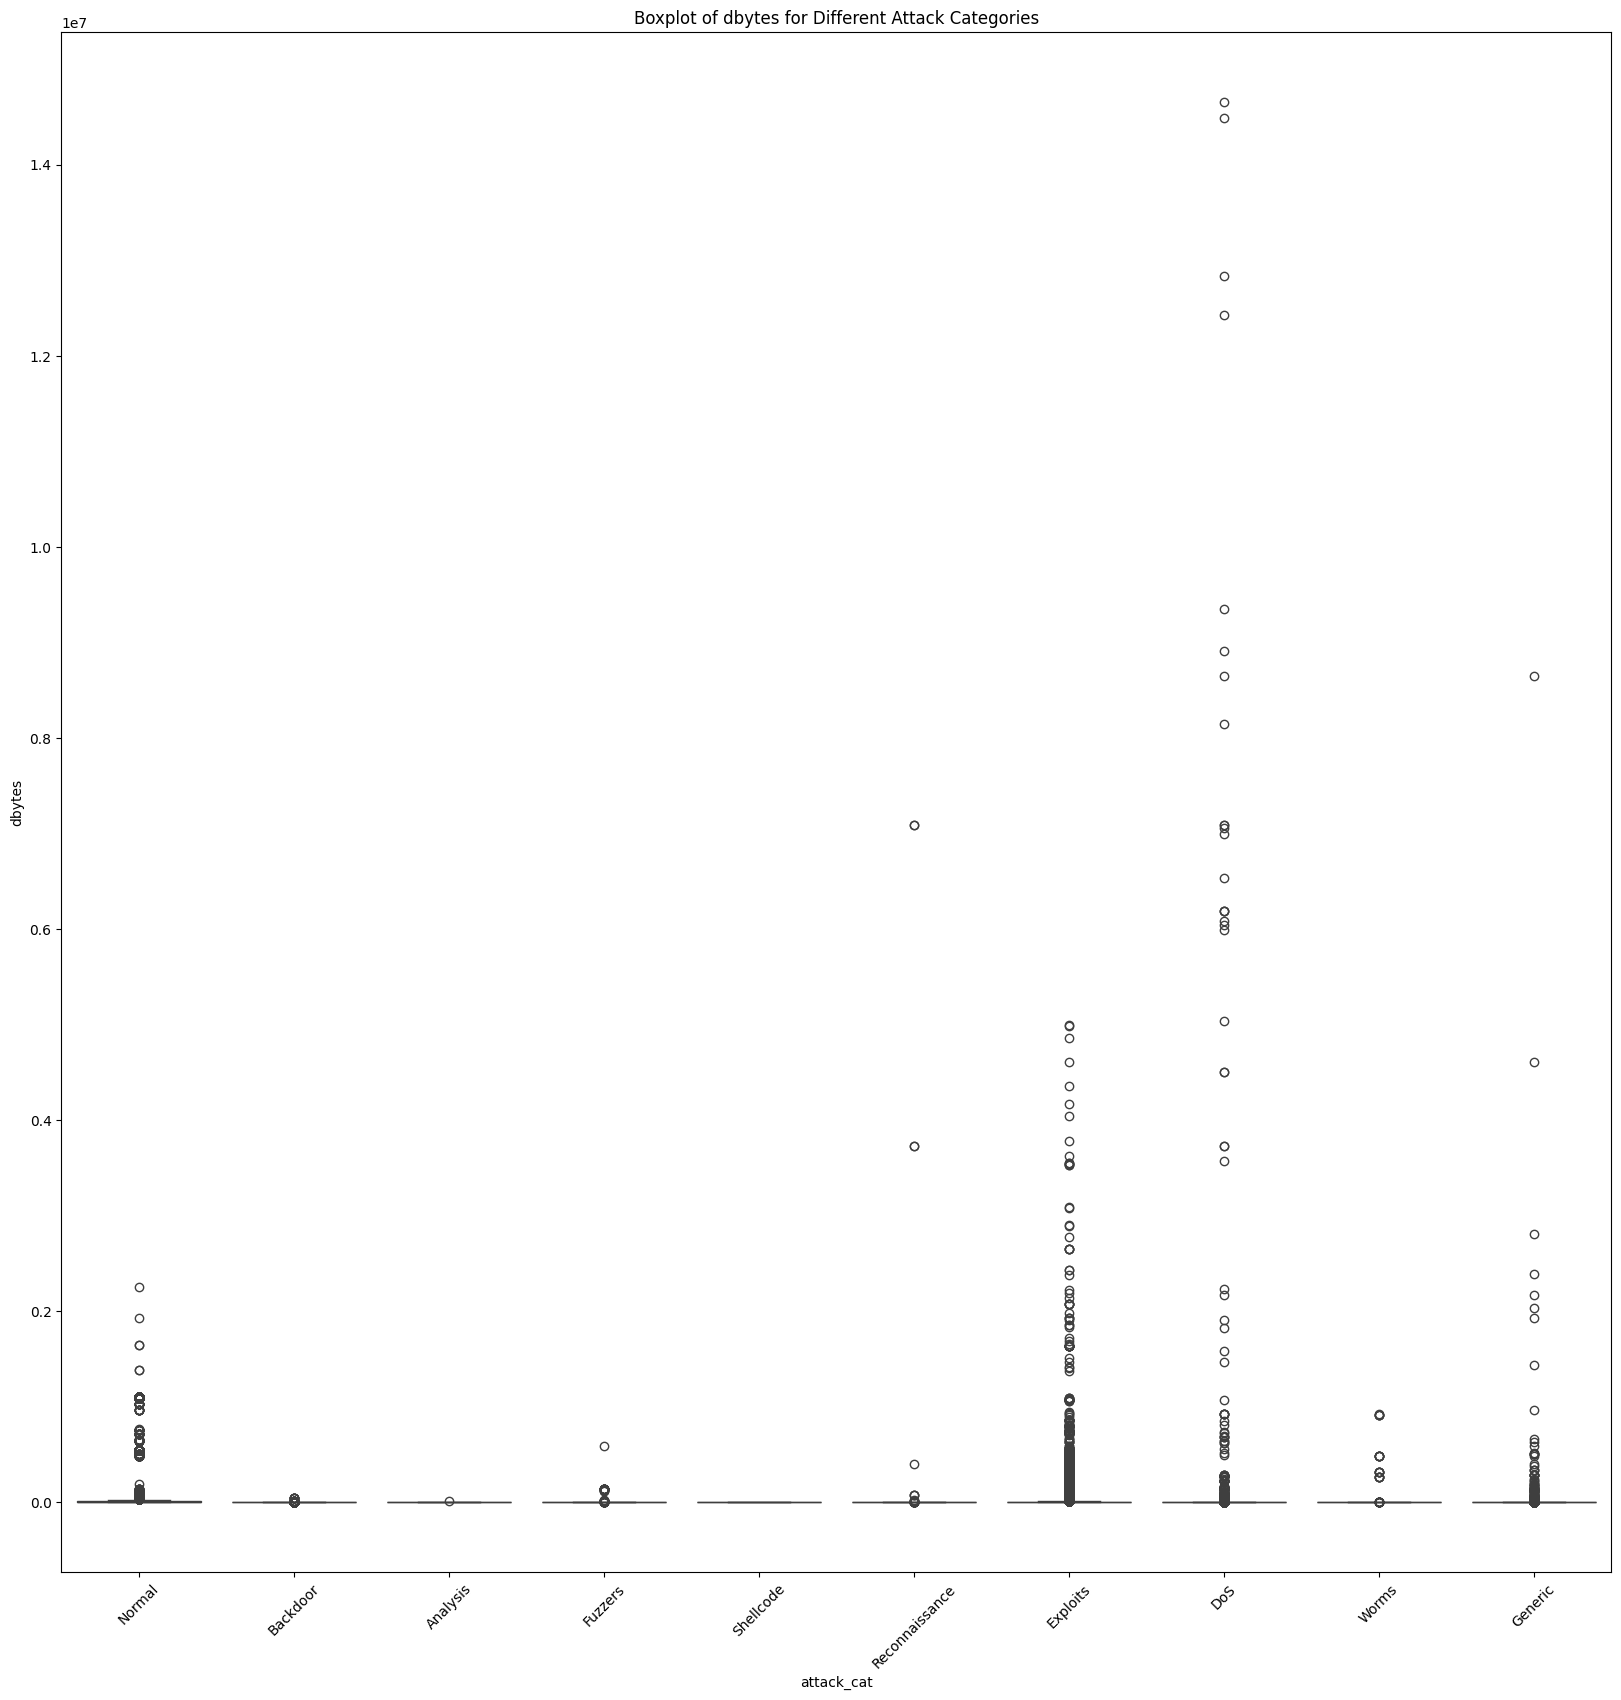

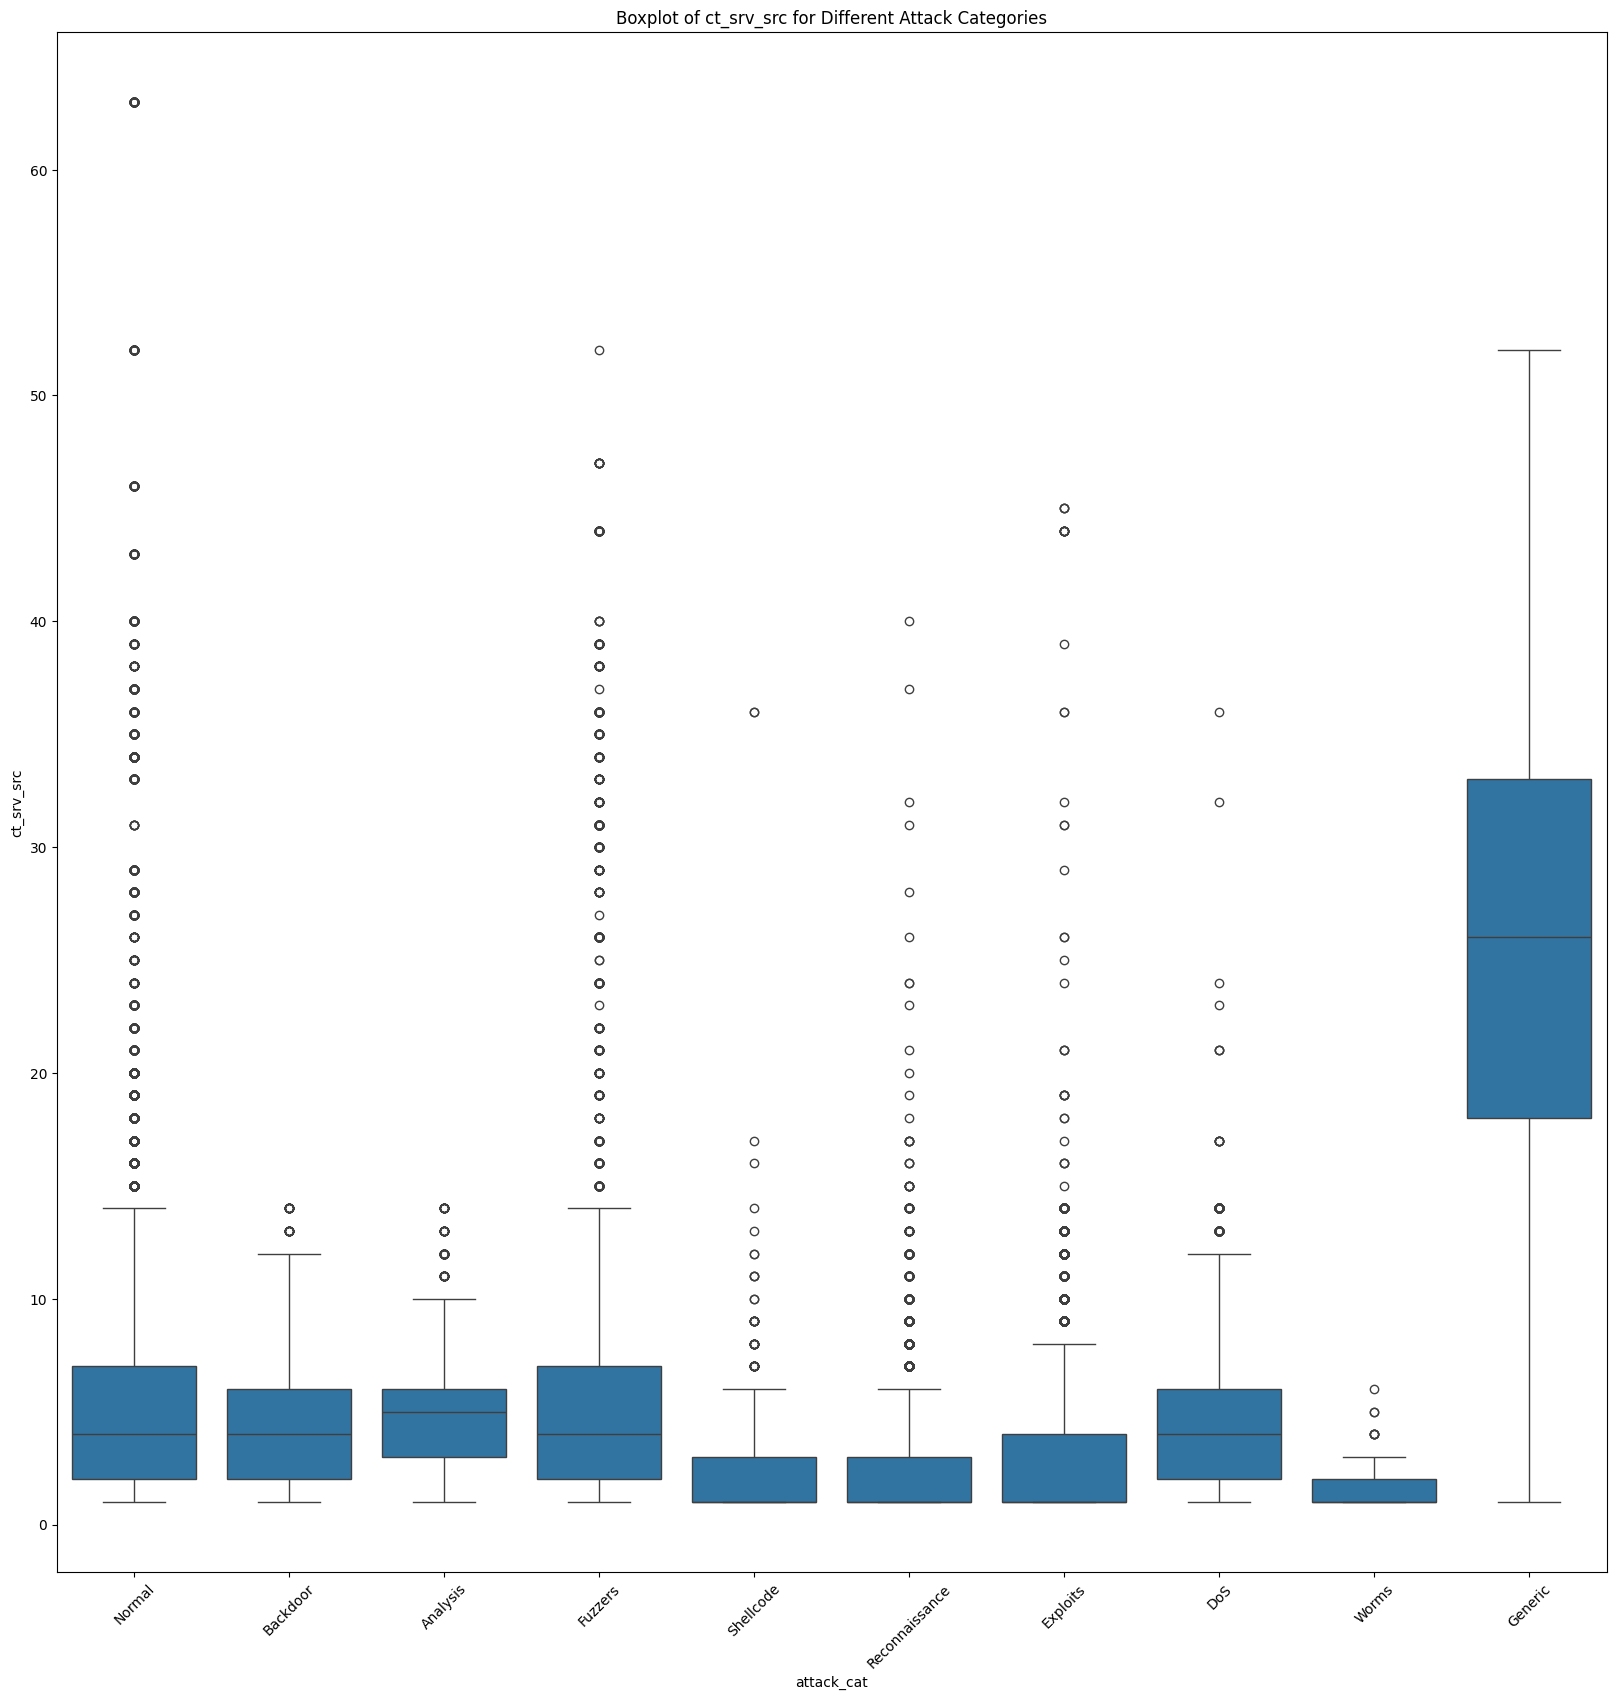

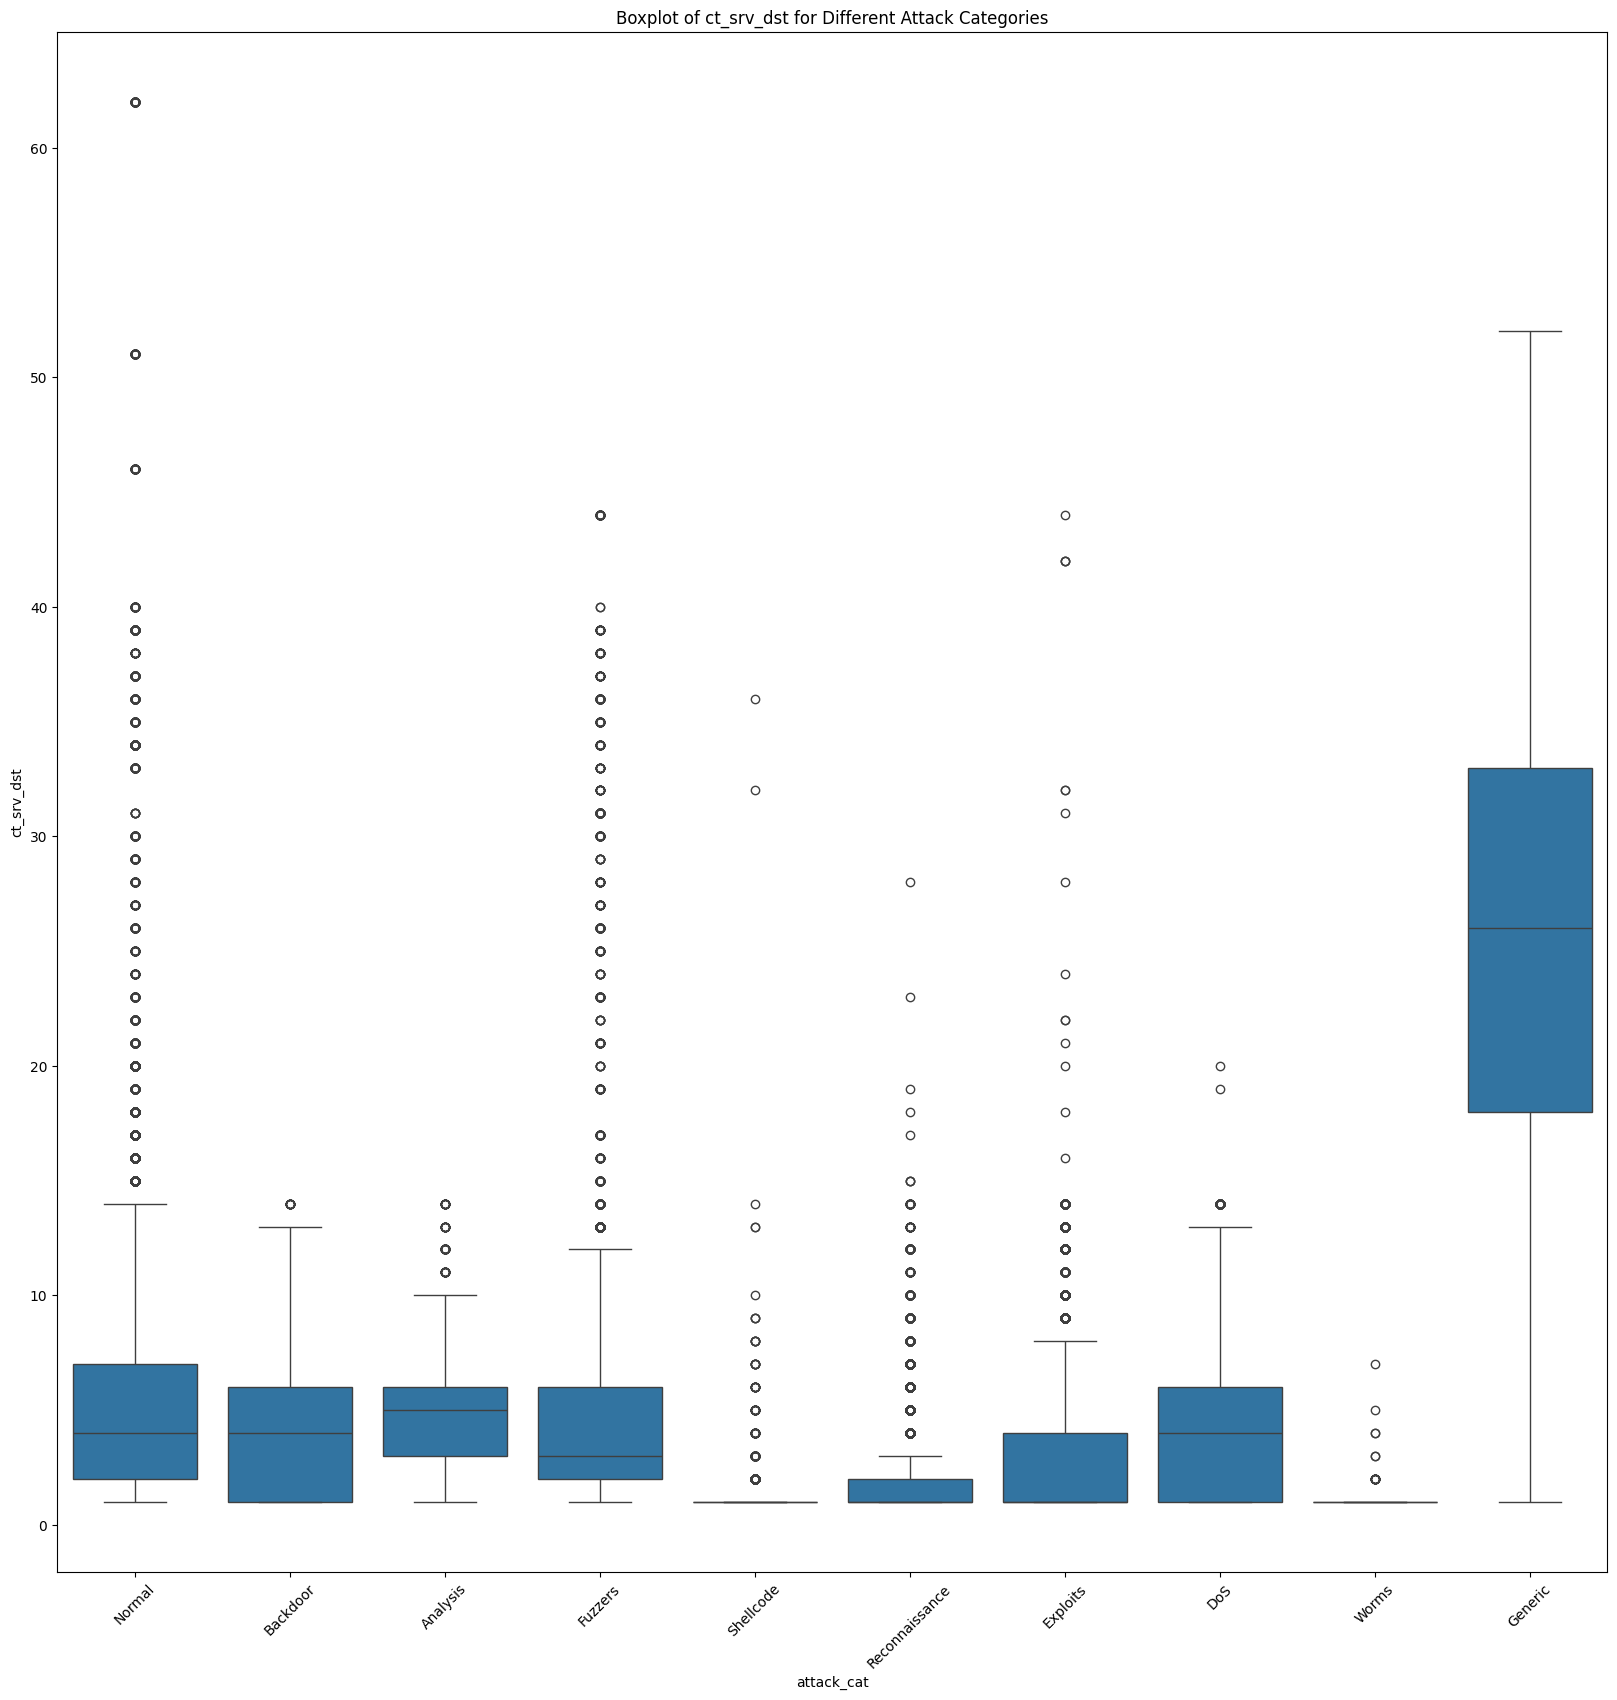

In [14]:
variables_to_analyze = ['spkts', 'sbytes', 'dpkts', 'dbytes', 'ct_srv_src', 'ct_srv_dst']

plt.figure(figsize=(20, 20))
for variable in variables_to_analyze:
    plt.figure(figsize=(20, 20))
    sns.boxplot(x='attack_cat', y=variable, data=df_UNSW_NB15)
    plt.title(f'Boxplot of {variable} for Different Attack Categories')
    plt.xticks(rotation=45)
    plt.show()

* Normal and Attacks Differ in Scale:
Normal data tends to have a larger scale compared to many types of attacks, as shown by fields such as the number of packets (spkts), number of bytes (sbytes), and the number of connections (ct_srv_src and ct_srv_dst).

* Attacks Usually Have a Smaller Scale:
Attack types such as Reconnaissance, Backdoor, and Analysis typically have lower average values across many numerical fields compared to normal data.

* Diverse Distribution of Attack Data:
Different attack types exhibit diversity in the average values and distribution of numerical fields. This highlights the distinct characteristics of each attack type.

* Significant Differences in Key Fields:
Fields such as the number of packets, number of bytes, and number of connections show substantial differences between normal and attack data.

In summary, these numerical fields can be utilized to build intrusion detection models based on the differences in features between normal and attack data.

# Pre-processing

In order to train a multi-class classification model for detecting the type of attack the data entries that were labeld as normal were dropped

In [ ]:
df_UNSW_NB15.drop(["id"],axis=1,inplace=True)

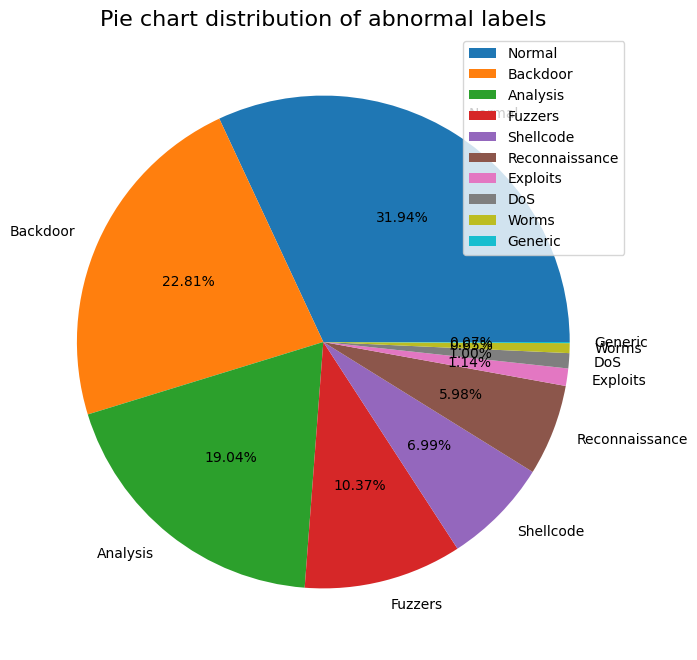

In [ ]:
plt.figure(figsize=(8,8))

plt.pie(df_UNSW_NB15.attack_cat.value_counts(),labels =df_UNSW_NB15.attack_cat.unique(), autopct='%0.2f%%')

plt.title("Pie chart distribution of abnormal labels",fontsize=16)

plt.legend()


plt.show()

In [ ]:
df_UNSW_NB15 = df_UNSW_NB15[df_UNSW_NB15["label"]==1]
df_UNSW_NB15.drop(["label"],inplace=True,axis=1)

<ipython-input-14-363afd8ef88e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UNSW_NB15.drop(["label"],inplace=True,axis=1)


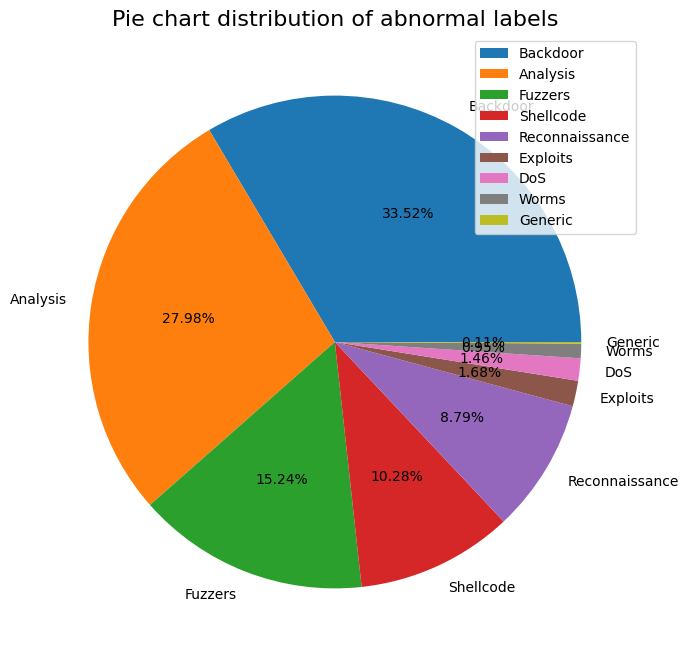

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df_UNSW_NB15.attack_cat.value_counts(),labels =df_UNSW_NB15.attack_cat.unique(), autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [ ]:
df_UNSW_NB15.shape

(119341, 43)

# 2. **Modeling**


The metric that is best suited for this task is precision for two reasons. The first reason is the class imbalnce meaning that a high accuracy could mean that some classes are not being observed. The second reason is that precision penalizes false positives (incorrectly classifying one class as another)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(y_true, y_predicted,title):
  """
  This function evaluates a classification model by printing classification report
  and plotting the confusion matrix.

  Args:
      y_true (array-like): True labels for the classification task.
      y_predicted (array-like): Predicted labels for the classification task.
  """

  # Print classification report
  print(classification_report(y_true, y_predicted))

  # Generate confusion matrix
  cf_matrix = confusion_matrix(y_true, y_predicted)

  # Create ConfusionMatrixDisplay object
  cmd = ConfusionMatrixDisplay(cf_matrix)
  # Plot the confusion matrix
  cmd.plot()
  plt.title(title)
  plt.show()



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# A data frame to evaluate the metrics of different models
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

## Train_Test split

In [ ]:
X = df_UNSW_NB15.drop("attack_cat",axis=1)
y,_ = pd.factorize(df_UNSW_NB15["attack_cat"])# Enumerating the labels

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)


## Preform Encoders

In [ ]:
# Getting the numerical and non numerical columns in order to convert the non numerical values to numerical rpresentaion
numeric_cols= []
cat_cols=[]
for data in X_train.columns:
  if X_train[data].dtype == 'object':
    cat_cols.append(data)
  else:
    numeric_cols.append(data)

In [ ]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [ ]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numeric_cols),
    ('categorical', categorical_pipeline, cat_cols)
])

In [ ]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Training and Testing

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Accuracy of Decision tree classifier on training set: 0.77
Accuracy of Decision tree classifier on test set: 0.77


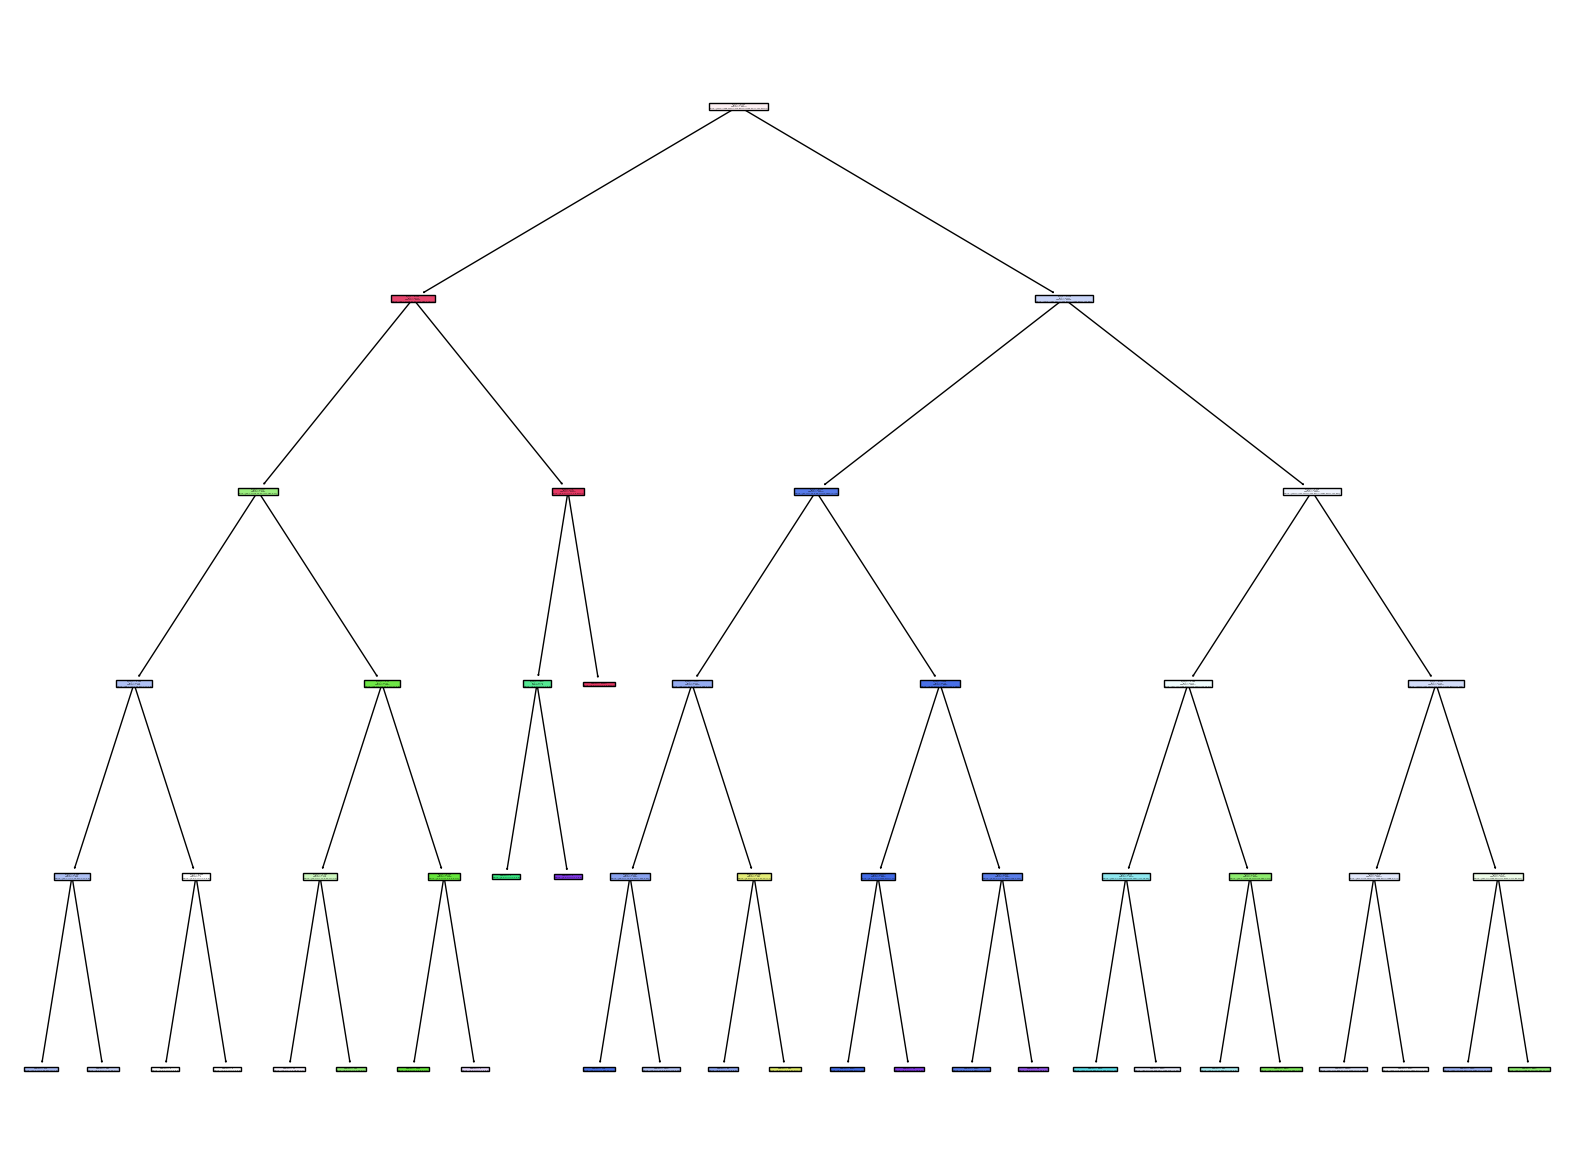

In [ ]:
dtc=DecisionTreeClassifier(max_depth =5).fit(X_train, y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.88      0.16      0.27       412
           2       0.82      0.80      0.81      3634
           3       1.00      0.01      0.03       220
           4       0.83      0.65      0.73      2113
           5       0.58      0.94      0.72      6663
           6       0.62      0.01      0.01      2419
           7       0.00      0.00      0.00        23
           8       1.00      0.98      0.99      8050

    accuracy                           0.77     23869
   macro avg       0.64      0.39      0.40     23869
weighted avg       0.79      0.77      0.73     23869



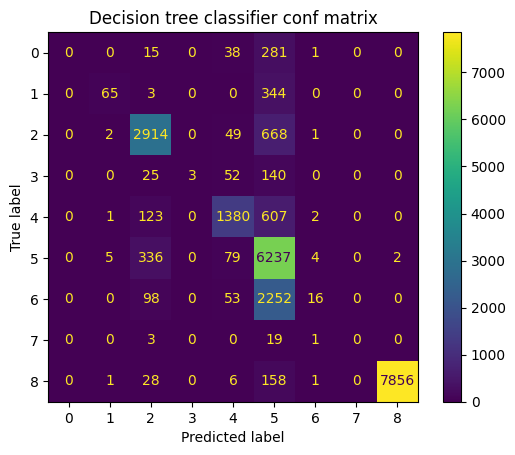

In [ ]:
y_preds = dtc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["Decision Tree"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Decision tree classifier conf matrix')

Accuracy of Decision tree classifier on training set: 0.87
Accuracy of Decision tree classifier on test set: 0.79


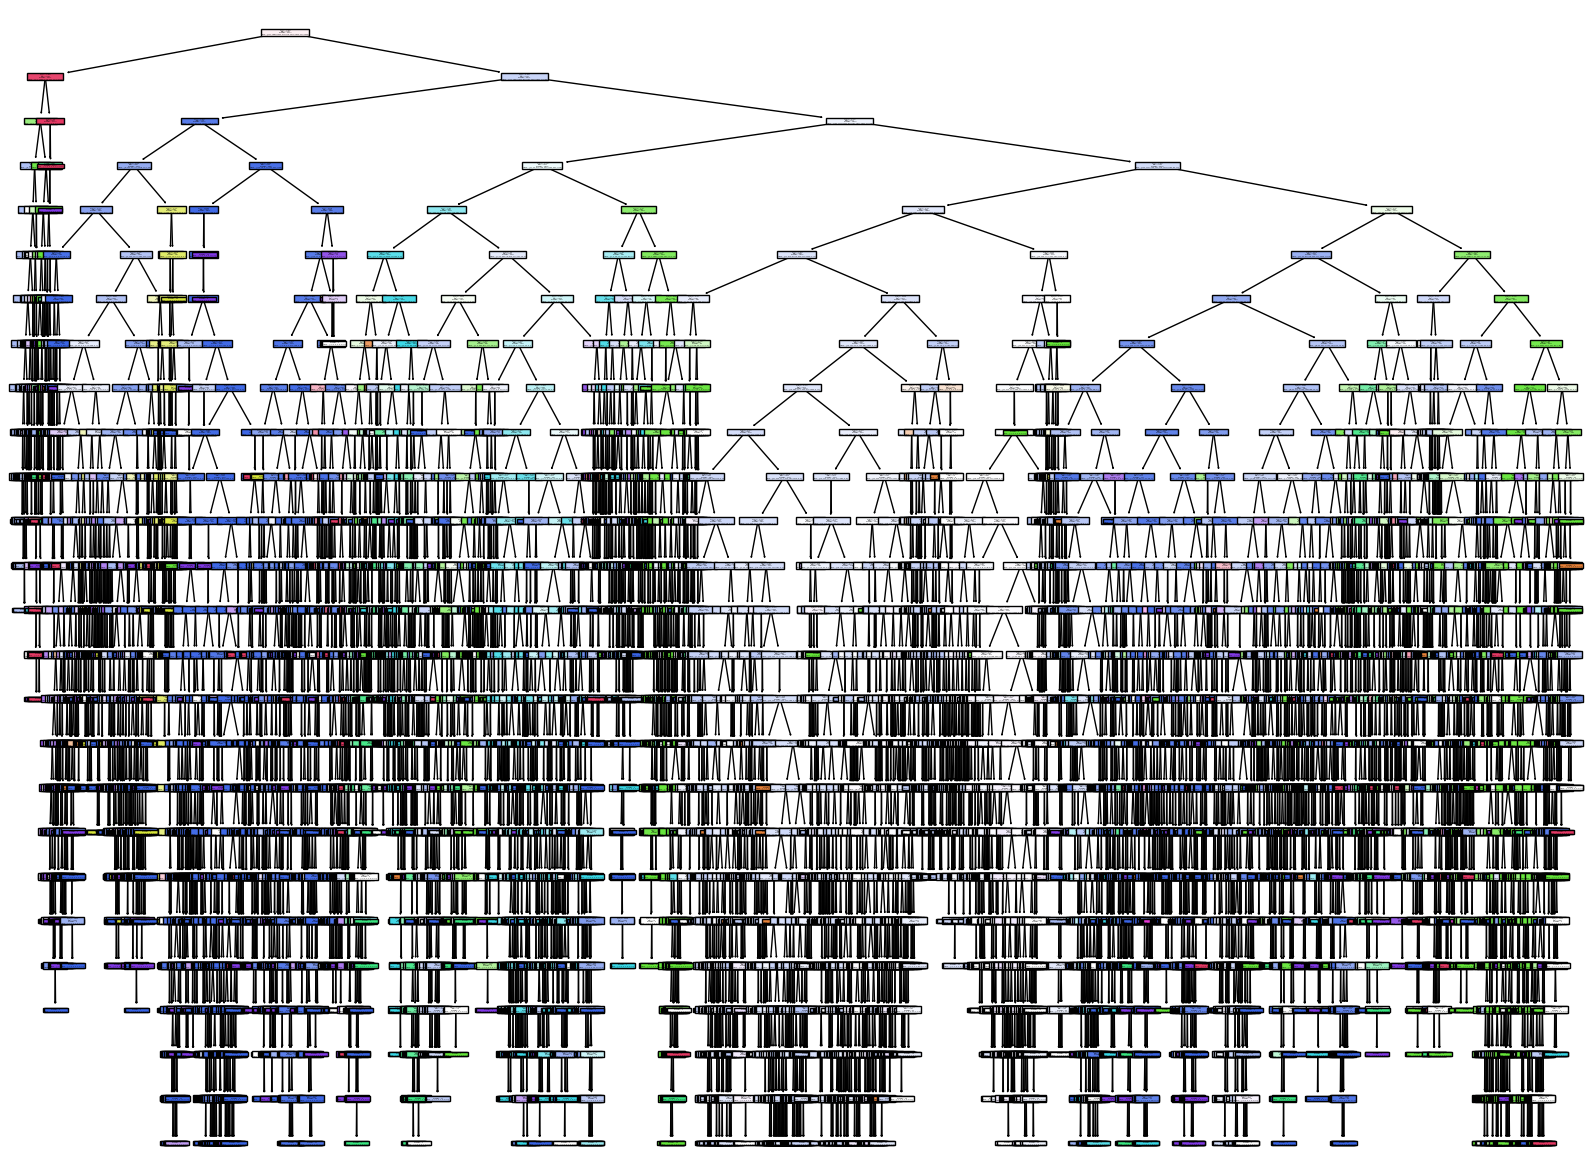

In [ ]:
dtc=DecisionTreeClassifier(max_depth =25).fit(X_train, y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.54      0.13      0.21       335
           1       0.70      0.24      0.35       412
           2       0.95      0.88      0.91      3634
           3       0.66      0.66      0.66       220
           4       0.91      0.76      0.83      2113
           5       0.63      0.82      0.71      6663
           6       0.29      0.19      0.23      2419
           7       0.41      0.39      0.40        23
           8       0.99      0.98      0.99      8050

    accuracy                           0.79     23869
   macro avg       0.67      0.56      0.59     23869
weighted avg       0.79      0.79      0.78     23869



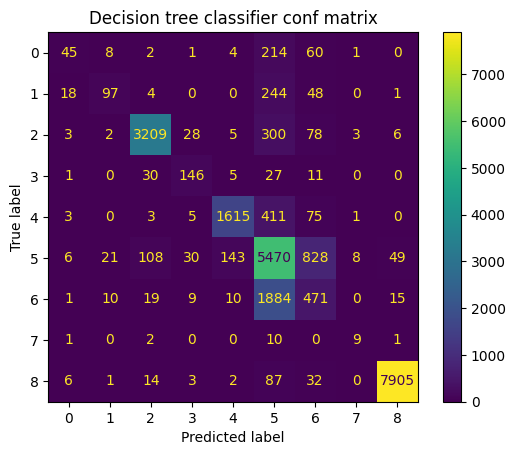

In [ ]:
y_preds = dtc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["Decision Tree edited"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Decision tree classifier conf matrix')

### Decision tree Conclusion:

The decision tree models that were tried did not give good results as the best model had a precision of 67%

Also the second model was overfitting the data as it had 87% accuracy on the training set and 79% accuracy on the test data

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.7795584045584045
Random forest classifier Accuracy score (test)  0.7830659013783569


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       1.00      0.05      0.10       412
           2       0.88      0.85      0.86      3634
           3       0.00      0.00      0.00       220
           4       0.85      0.65      0.73      2113
           5       0.59      0.96      0.73      6663
           6       0.00      0.00      0.00      2419
           7       0.00      0.00      0.00        23
           8       1.00      0.98      0.99      8050

    accuracy                           0.78     23869
   macro avg       0.48      0.39      0.38     23869
weighted avg       0.73      0.78      0.73     23869



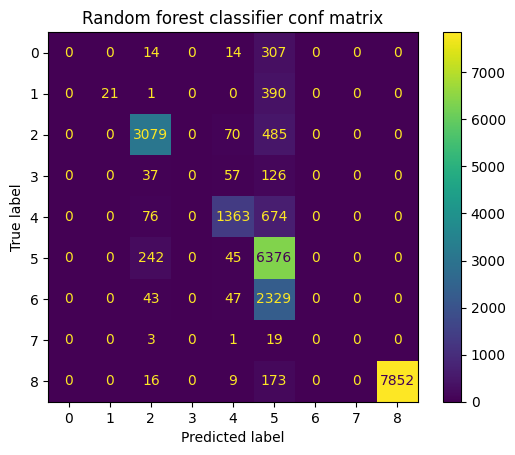

In [ ]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')


In [ ]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.8680031841796547
Random forest classifier Accuracy score (test)  0.8073233063806611


              precision    recall  f1-score   support

           0       0.61      0.12      0.20       335
           1       0.79      0.24      0.37       412
           2       0.95      0.90      0.93      3634
           3       0.71      0.70      0.71       220
           4       0.93      0.76      0.84      2113
           5       0.64      0.86      0.74      6663
           6       0.33      0.20      0.25      2419
           7       0.43      0.13      0.20        23
           8       1.00      0.98      0.99      8050

    accuracy                           0.81     23869
   macro avg       0.71      0.54      0.58     23869
weighted avg       0.81      0.81      0.79     23869



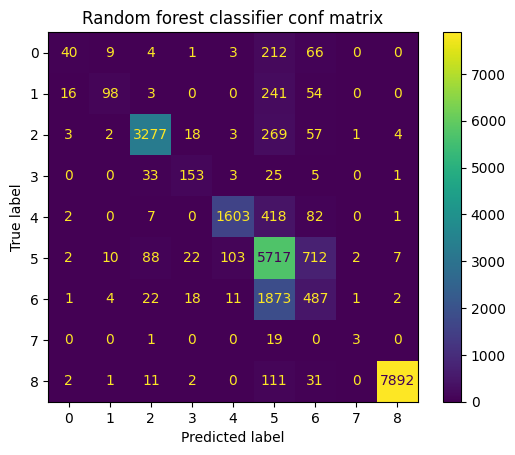

In [ ]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF edited"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')

### Random forest Conclusion

The random forest gave some decent result 80% precision however it overfit the data and it could not properly differentiate between the different labels i.e. the decision boundries could not be properly defined

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.7567975197955508


              precision    recall  f1-score   support

           0       0.23      0.01      0.03       335
           1       0.78      0.17      0.28       412
           2       0.78      0.85      0.81      3634
           3       0.70      0.31      0.43       220
           4       0.70      0.58      0.64      2113
           5       0.62      0.80      0.70      6663
           6       0.29      0.17      0.22      2419
           7       0.50      0.04      0.08        23
           8       1.00      0.98      0.99      8050

    accuracy                           0.76     23869
   macro avg       0.62      0.44      0.46     23869
weighted avg       0.74      0.76      0.74     23869



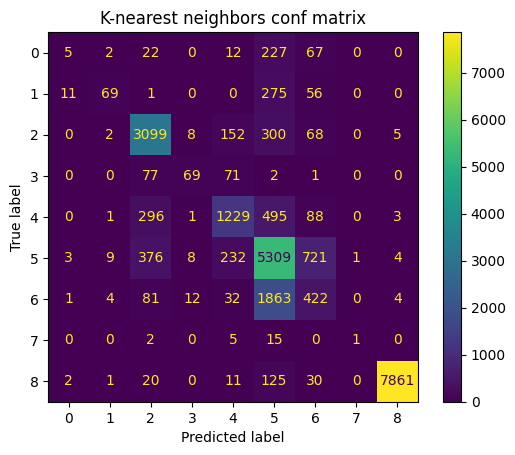

In [ ]:
y_preds = knn.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["KNN"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'K-nearest neighbors conf matrix')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.7600653567388663


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.60      0.01      0.02       335
           1       0.71      0.16      0.26       412
           2       0.74      0.86      0.80      3634
           3       0.72      0.21      0.32       220
           4       0.75      0.51      0.61      2113
           5       0.61      0.87      0.71      6663
           6       0.30      0.09      0.13      2419
           7       0.00      0.00      0.00        23
           8       1.00      0.98      0.99      8050

    accuracy                           0.76     23869
   macro avg       0.60      0.41      0.43     23869
weighted avg       0.74      0.76      0.73     23869



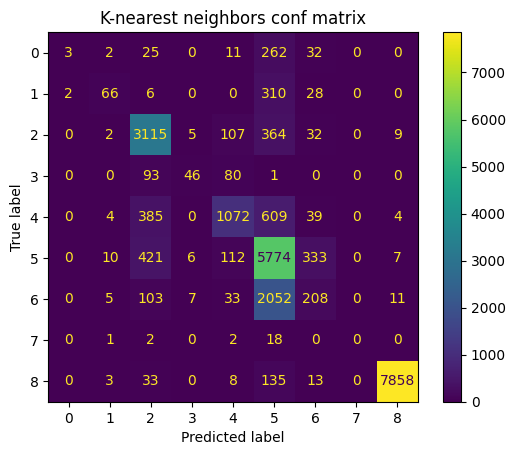

In [ ]:
y_preds = knn.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["KNN edited"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'K-nearest neighbors conf matrix')

### KNN Conclusion

KNN could not be improved further and since it is a non-parametric algorithm no further hyperparameter tuning is possible

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)
log_clf.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.7368547846489023
Accuracy of Logistic regression classifier on test set: 0.7399136955884201


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.83      0.15      0.26       412
           2       0.73      0.77      0.75      3634
           3       0.00      0.00      0.00       220
           4       0.65      0.50      0.56      2113
           5       0.58      0.88      0.70      6663
           6       0.41      0.02      0.03      2419
           7       0.00      0.00      0.00        23
           8       0.97      0.97      0.97      8050

    accuracy                           0.74     23869
   macro avg       0.46      0.37      0.36     23869
weighted avg       0.71      0.74      0.69     23869



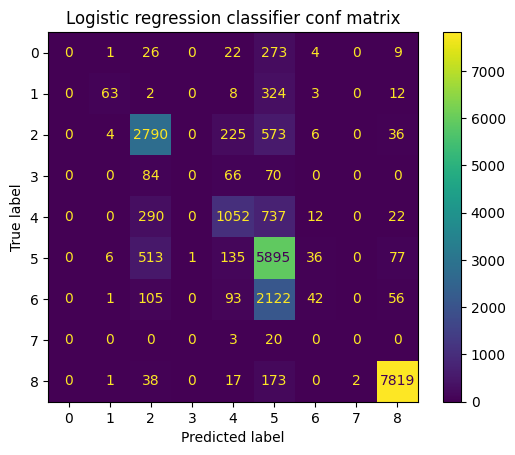

In [ ]:
y_preds = log_clf.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["LR"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Logistic regression classifier conf matrix')

In [ ]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=15.0)
log_clf.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.736571979219038
Accuracy of Logistic regression classifier on test set: 0.74020696300641


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.83      0.15      0.26       412
           2       0.73      0.77      0.75      3634
           3       0.00      0.00      0.00       220
           4       0.65      0.50      0.56      2113
           5       0.58      0.89      0.70      6663
           6       0.44      0.02      0.03      2419
           7       0.00      0.00      0.00        23
           8       0.97      0.97      0.97      8050

    accuracy                           0.74     23869
   macro avg       0.47      0.37      0.36     23869
weighted avg       0.72      0.74      0.69     23869



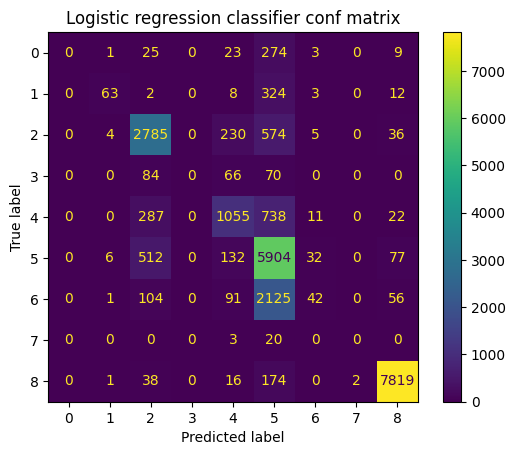

In [ ]:
y_preds = log_clf.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["LR edited"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Logistic regression classifier conf matrix')

### Logistic Regression Conclusion

In both experiments the logistic regression model failed to converge meaning that it could yield better reults if given more iterations however since it was always biased towards classes with higher samples it's diffuclt to have it give a good precision score

## SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
C = 5.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of SVC on training set: 0.76
Accuracy of SVC on test set: 0.76


SVC(C=5.0, gamma=2.5, kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.90      0.17      0.28       412
           2       0.80      0.76      0.78      3634
           3       0.40      0.15      0.21       220
           4       0.68      0.64      0.66      2113
           5       0.59      0.89      0.71      6663
           6       0.37      0.05      0.09      2419
           7       0.00      0.00      0.00        23
           8       0.99      0.98      0.98      8050

    accuracy                           0.76     23869
   macro avg       0.53      0.40      0.41     23869
weighted avg       0.74      0.76      0.72     23869



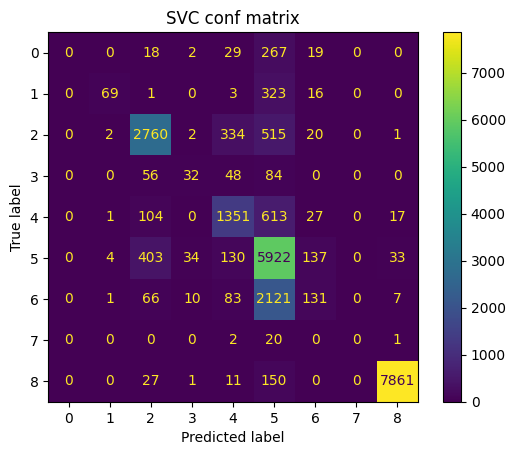

In [ ]:
y_preds = clfc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["SVM"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'SVC conf matrix')

### SVM Conclusion


The SVM model took a lot of time to complete training yet it gave no promising  results that could be worth further inspection

# Overall Conclution


As the below table shows no model could give promising results therfore the data should be augmented in order to get more data to account for the great imbalance that is present in the data.

In [ ]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score
Decision Tree,77.38%,77.38%,78.54%,72.82%
Decision Tree edited,79.46%,79.46%,79.08%,78.39%
RF,78.31%,78.31%,72.68%,73.38%
RF edited,80.73%,80.73%,80.54%,79.48%
KNN,75.68%,75.68%,74.29%,73.87%
KNN edited,76.01%,76.01%,74.32%,72.80%
LR,73.99%,73.99%,71.34%,69.45%
LR edited,74.02%,74.02%,71.65%,69.47%
SVM,75.94%,75.94%,73.92%,72.38%
